In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from openpyxl import load_workbook
import csv
import pandas as pd
import matplotlib.ticker as plticker
from matplotlib import colors

# Step 1. Load the data

* **`RPPA_level1.xlsx:`** Reverse-Phase Protein Array, representing the gene-(signaling) protein expression data
* **`GCP_PBS_Timepoint_specific_normalized.csv:`** Global Chromatin Profiling, quantifying the post-translational modifications on histone proteins 

In [2]:
rppa_file = os.path.join('dataset/rppa/','MDD_RPPA_Level3_preprocessed_2020-9.xlsx')
gcppbs_file = os.path.join('dataset/rppa/','LINCS_GCP_Plate72_annotated_minimized_2019-12-16_16-53-04_LVL3_preprocessed.xlsx')

# rppa_sheet = pd.read_csv(rppa_file).drop('antibody', axis=1).set_index('Gene')
# rppa_sheet.columns = [c.split('_')[0]+'_'+c.split('_')[1] for c in rppa_sheet.columns]
# # print(rppa_sheet.keys())
# rppa_sheet
rppa_sheets = pd.read_excel(rppa_file, sheet_name=None)
rppa_sheet = rppa_sheets['MDD_RPPA_Level3_annotated'].set_index('Protein')

rppa_sheet

,Ctrl_1_C1_A,Ctrl_1_C1_B,Ctrl_1_C1_C,Ctrl_4_C1_A,Ctrl_4_C1_B,Ctrl_4_C1_C,Ctrl_8_C1_A,Ctrl_8_C1_B,Ctrl_8_C1_C,Ctrl_24_C1_A,...,EGF_4_C1_C,EGF_8_C1_A,EGF_8_C1_B,EGF_8_C1_C,EGF_24_C1_A,EGF_24_C1_B,EGF_24_C1_C,EGF_48_C1_A,EGF_48_C1_B,EGF_48_C1_C
Protein,,,,,,,,,,,,,,,,,,,,,
ABL1,0.000310,0.031685,-0.055298,0.051052,0.026680,-0.021996,0.021755,-0.005544,-0.024761,-0.047121,...,-0.087755,-0.020787,-0.107387,-0.120227,-0.103292,-0.150854,-0.113138,-0.021530,-0.015754,-0.135435
ACACApS79,0.069518,-0.020398,-0.093938,-0.055590,-0.098645,-0.272289,-0.077084,0.019222,-0.281157,0.045707,...,-0.073930,0.005993,0.039189,0.024400,0.028183,0.173964,0.088723,0.113537,0.247388,0.101702
ACACA,-0.264707,-0.265937,-0.302433,-0.506396,-0.674463,-0.918469,-0.661592,-0.653774,-0.852282,-0.548505,...,-0.498349,-0.505849,-0.257069,-0.364185,-0.428440,-0.332328,-0.152577,0.074101,0.286594,0.029798
ACTB,-0.118066,-0.022769,-0.085344,-0.099919,0.063704,-0.122041,-0.154931,-0.067040,-0.165731,-0.338587,...,-0.028344,-0.085220,0.024031,-0.056720,-0.079659,0.085222,-0.107853,0.139159,0.016584,-0.155145
ADAR,-0.099450,-0.220497,-0.000719,-0.052901,-0.113386,-0.145133,-0.154334,-0.130278,0.112978,-0.094341,...,-0.186506,-0.043701,-0.172779,0.057116,-0.000566,0.363417,0.428583,0.150507,0.218137,0.619550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,0.126525,0.469130,0.512731,0.049638,0.288480,0.677562,0.448915,0.278702,0.266965,0.797129,...,0.151334,0.091401,-0.093945,0.036093,-0.116469,-0.336443,-0.550910,-0.779015,-1.248974,-1.233488
YBX1pS102,-0.432223,-0.424690,-0.881142,-0.540705,-0.580833,-0.616678,-0.431430,-0.377594,-0.501575,-0.744400,...,0.201669,0.346718,0.340233,0.255079,0.269912,0.376047,0.348544,0.219888,0.153807,0.234803
YWHAB,0.061919,0.164463,0.139105,0.062465,0.169988,0.102759,0.077519,0.114281,0.050505,0.010207,...,-0.053050,-0.030945,0.011141,-0.018970,-0.083856,0.007409,-0.174587,-0.214546,-0.162499,-0.215125


In [3]:
# remove insignificant proteins (p>=0.05)
rppa_p005_file = os.path.join('dataset/tumour_microenv_results_2020-9/rppa/','pval_005_rppa.xlsx')
rppa_p005 = pd.read_excel(rppa_p005_file, sheet_name='Sheet1').set_index('Protein')
rppa_p005

,p
Protein,
RPA2pS4S8,4.886948e-02
CHEK2,4.607508e-02
ERCC1,4.395053e-02
RPS6KA1,4.314620e-02
BID,4.235510e-02
...,...
HIF1A,9.166431e-07
DUSP4,7.442644e-07
CCNB1,4.328352e-07


In [4]:
rppa_file = os.path.join('dataset/rppa/','MDD_RPPA_Level3_preprocessed_2020-9.xlsx')
rppa_sheets = pd.read_excel(rppa_file, sheet_name=None)
rppa_sheet = rppa_sheets['MDD_RPPA_Level3_annotated'].set_index('Protein')
rppa_sheet.columns = [c.split('_')[0]+'_'+c.split('_')[1] for c in rppa_sheet.columns]

rppa_p005_file = os.path.join('dataset/tumour_microenv_results_2020-9/rppa/','pval_005_rppa.xlsx')
rppa_p005 = pd.read_excel(rppa_p005_file, sheet_name='Sheet1').set_index('Protein')

sig_proteins = rppa_p005.index
rppa_sheet = rppa_sheet[rppa_sheet.index.isin(sig_proteins)]
rppa_sheet

,Ctrl_1,Ctrl_1,Ctrl_1,Ctrl_4,Ctrl_4,Ctrl_4,Ctrl_8,Ctrl_8,Ctrl_8,Ctrl_24,...,EGF_4,EGF_8,EGF_8,EGF_8,EGF_24,EGF_24,EGF_24,EGF_48,EGF_48,EGF_48
Protein,,,,,,,,,,,,,,,,,,,,,
ACACApS79,0.069518,-0.020398,-0.093938,-0.055590,-0.098645,-0.272289,-0.077084,0.019222,-0.281157,0.045707,...,-0.073930,0.005993,0.039189,0.024400,0.028183,0.173964,0.088723,0.113537,0.247388,0.101702
ACACA,-0.264707,-0.265937,-0.302433,-0.506396,-0.674463,-0.918469,-0.661592,-0.653774,-0.852282,-0.548505,...,-0.498349,-0.505849,-0.257069,-0.364185,-0.428440,-0.332328,-0.152577,0.074101,0.286594,0.029798
ACTB,-0.118066,-0.022769,-0.085344,-0.099919,0.063704,-0.122041,-0.154931,-0.067040,-0.165731,-0.338587,...,-0.028344,-0.085220,0.024031,-0.056720,-0.079659,0.085222,-0.107853,0.139159,0.016584,-0.155145
ADAR,-0.099450,-0.220497,-0.000719,-0.052901,-0.113386,-0.145133,-0.154334,-0.130278,0.112978,-0.094341,...,-0.186506,-0.043701,-0.172779,0.057116,-0.000566,0.363417,0.428583,0.150507,0.218137,0.619550
AIM1,-0.121296,-0.065828,-0.061636,0.022980,-0.000757,-0.054192,-0.060577,-0.065081,-0.060935,-0.351726,...,0.002874,0.043931,0.001903,0.013054,0.147682,0.072050,0.162921,0.108015,0.018869,0.052094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,0.126525,0.469130,0.512731,0.049638,0.288480,0.677562,0.448915,0.278702,0.266965,0.797129,...,0.151334,0.091401,-0.093945,0.036093,-0.116469,-0.336443,-0.550910,-0.779015,-1.248974,-1.233488
YBX1pS102,-0.432223,-0.424690,-0.881142,-0.540705,-0.580833,-0.616678,-0.431430,-0.377594,-0.501575,-0.744400,...,0.201669,0.346718,0.340233,0.255079,0.269912,0.376047,0.348544,0.219888,0.153807,0.234803
YWHAB,0.061919,0.164463,0.139105,0.062465,0.169988,0.102759,0.077519,0.114281,0.050505,0.010207,...,-0.053050,-0.030945,0.011141,-0.018970,-0.083856,0.007409,-0.174587,-0.214546,-0.162499,-0.215125


In [5]:
# gcp_sheet = pd.read_csv(gcppbs_file)
# gcp_sheet

In [5]:
rppa_sheet = rppa_sheet.apply(pd.to_numeric, errors='ignore')

rppa_averaged = rppa_sheet.groupby(rppa_sheet.columns, axis=1, sort=False).mean()
rppa_averaged = rppa_averaged[rppa_averaged.columns[~rppa_averaged.columns.str.endswith('_1')]]
rppa_averaged

,Ctrl_4,Ctrl_8,Ctrl_24,Ctrl_48,BMP2_4,BMP2_8,BMP2_24,BMP2_48,IFNG_4,IFNG_8,...,HGF_24,HGF_48,OSM_4,OSM_8,OSM_24,OSM_48,EGF_4,EGF_8,EGF_24,EGF_48
Protein,,,,,,,,,,,,,,,,,,,,,
ACACApS79,-0.142175,-0.113006,0.134518,-0.039729,-0.064886,-0.057137,0.113238,0.088875,-0.079851,0.058141,...,0.181315,0.193398,-0.624484,-0.038890,0.126776,0.124391,0.010657,0.023194,0.096957,0.154209
ACACA,-0.699776,-0.722549,-0.415850,-0.335162,-0.066088,-0.041917,0.271822,0.261609,0.112509,0.078456,...,-0.022620,0.097078,-0.157995,-0.365247,-0.089365,-0.201320,-0.398932,-0.375701,-0.304448,0.130164
ACTB,-0.052752,-0.129234,-0.262818,-0.414436,0.025325,0.056454,0.169959,0.256429,0.072412,0.152106,...,-0.081691,0.017452,0.040291,0.080555,0.097897,-0.072785,-0.020946,-0.039303,-0.034097,0.000199
ADAR,-0.103806,-0.057212,0.065246,-0.321926,-0.103748,-0.026020,0.203358,0.417079,-0.123841,-0.071567,...,0.229156,0.359912,-0.158395,0.010882,0.239280,0.463670,-0.166048,-0.053121,0.263812,0.329398
AIM1,-0.010656,-0.062198,-0.483361,-0.380001,-0.004422,0.070170,-0.170334,-0.091978,0.033117,0.083728,...,-0.136851,-0.378746,0.046287,0.105904,-0.016676,-0.347914,0.014943,0.019630,0.127551,0.059660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,0.338560,0.331527,0.560180,0.946066,0.182622,-0.010110,-0.312291,-0.847871,0.078657,0.012855,...,-0.245952,-0.546247,0.096528,0.102677,-0.419462,-0.690891,0.134526,0.011183,-0.334607,-1.087159
YBX1pS102,-0.579405,-0.436866,-0.835522,-0.799565,0.166153,0.197230,0.205932,0.044790,0.441147,0.510485,...,-0.238072,-0.468781,-0.004765,0.003751,0.074680,-0.457236,0.200917,0.314010,0.331501,0.202833
YWHAB,0.111738,0.080769,0.078832,0.169886,-0.007424,-0.042659,-0.073689,-0.121088,0.002308,0.003419,...,-0.055743,-0.080233,-0.028986,-0.066034,-0.094968,-0.095026,0.016194,-0.012925,-0.083678,-0.197390


# Step 2. Data Processing (RPPA data)

* 1) Combine multiple simialr/same colums or rows as one and to fold change 
* 2) Normalize the data - zscore normalization: df_zscore = (df - df.mean())/df.std()
* 3) Organize data of multiple time points as a 3-way tensor

In [6]:
# rppa_sheet = pd.read_csv(rppa_file).drop('antibody', axis=1).set_index('Gene')
# rppa_sheet.columns = [c.split('_')[0]+'_'+c.split('_')[1] for c in rppa_sheet.columns]

rppa_sheet = rppa_sheet.apply(pd.to_numeric, errors='ignore')

rppa_averaged = rppa_sheet.groupby(rppa_sheet.columns, axis=1, sort=False).mean()
rppa_averaged = rppa_averaged[rppa_averaged.columns[~rppa_averaged.columns.str.endswith('_1')]]


rppa_averaged= rppa_averaged[['Ctrl_4', 'Ctrl_8', 'Ctrl_24', 'Ctrl_48', 
               'EGF_4', 'EGF_8', 'EGF_24', 'EGF_48',
               'HGF_4', 'HGF_8', 'HGF_24', 'HGF_48', 
               'OSM_4', 'OSM_8','OSM_24', 'OSM_48', 
               'BMP2_4','BMP2_8', 'BMP2_24', 'BMP2_48', 
               'IFNG_4', 'IFNG_8', 'IFNG_24','IFNG_48', 
               'TGFB_4', 'TGFB_8', 'TGFB_24', 'TGFB_48'
               ]]


time_conditions=['_4','_8','_24','_48']

# rppa_averaged=rppa_averaged.apply(lambda x:x.columns, axis=1)

for time_condition in time_conditions:
    time_m=rppa_averaged.columns.str.endswith(time_condition)
    conditions=rppa_averaged.columns[time_m&(~rppa_averaged.columns.str.contains('Ctrl'))].unique()
    print (conditions)
    for condition in conditions:
        rppa_averaged[condition] = rppa_averaged[condition]-rppa_averaged['Ctrl'+time_condition]
    rppa_averaged=rppa_averaged.drop('Ctrl'+time_condition,axis=1)
    

rppa_averaged_binary = rppa_averaged.copy(deep=True)
rppa_averaged_binary[rppa_averaged_binary < 0] = -1
rppa_averaged_binary[rppa_averaged_binary >= 0] = 1
    
# rppa_averaged
# rppa_averaged = rppa_averaged.sub(rppa_averaged['ctrl_0'], axis=0).drop('ctrl_0',axis=1)
rppa_averaged = np.absolute(rppa_averaged)
# rppa_averaged = np.power(2, rppa_averaged)
protein_names = rppa_averaged.index
# tensor = rppa_averaged.to_numpy().reshape([275,6,5]).transpose([2, 0, 1])[1:,:,:]
tensor = rppa_averaged.to_numpy().reshape([rppa_averaged.shape[0],6,4]).transpose([2, 0, 1])
ligand_names = pd.Index([v.split('_')[0] for v in rppa_averaged.columns.to_numpy().reshape([6,4]).transpose([1,0])[0]])
print('Size of the RPPA tensor:',tensor.shape)
print(ligand_names)
rppa_averaged

Index(['EGF_4', 'HGF_4', 'OSM_4', 'BMP2_4', 'IFNG_4', 'TGFB_4'], dtype='object')
Index(['EGF_8', 'HGF_8', 'OSM_8', 'BMP2_8', 'IFNG_8', 'TGFB_8'], dtype='object')
Index(['EGF_24', 'HGF_24', 'OSM_24', 'BMP2_24', 'IFNG_24', 'TGFB_24'], dtype='object')
Index(['EGF_48', 'HGF_48', 'OSM_48', 'BMP2_48', 'IFNG_48', 'TGFB_48'], dtype='object')
Size of the RPPA tensor: (4, 274, 6)
Index(['EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB'], dtype='object')


,EGF_4,EGF_8,EGF_24,EGF_48,HGF_4,HGF_8,HGF_24,HGF_48,OSM_4,OSM_8,...,BMP2_24,BMP2_48,IFNG_4,IFNG_8,IFNG_24,IFNG_48,TGFB_4,TGFB_8,TGFB_24,TGFB_48
Protein,,,,,,,,,,,,,,,,,,,,,
ACACApS79,0.152832,0.136200,0.037562,0.193938,0.199244,0.157221,0.046797,0.233127,0.482309,0.074117,...,0.021280,0.128604,0.062324,0.171148,0.380278,0.713289,0.080166,0.024917,0.236249,0.122431
ACACA,0.300844,0.346848,0.111401,0.465326,0.378279,0.400327,0.393230,0.432240,0.541781,0.357302,...,0.687672,0.596771,0.812284,0.801005,0.589558,0.562646,0.855471,0.812629,0.423138,0.740998
ACTB,0.031806,0.089931,0.228721,0.414635,0.012234,0.073282,0.181127,0.431888,0.093043,0.209789,...,0.432777,0.670866,0.125165,0.281339,0.462946,0.185483,0.153416,0.406118,0.894917,1.027210
ADAR,0.062241,0.004090,0.198566,0.651324,0.015708,0.071103,0.163910,0.681838,0.054589,0.068093,...,0.138112,0.739005,0.020035,0.014355,0.105648,0.686257,0.055798,0.060584,0.176686,0.897050
AIM1,0.025600,0.081827,0.610912,0.439661,0.053700,0.089997,0.346510,0.001256,0.056944,0.168102,...,0.313027,0.288023,0.043774,0.145926,0.534248,0.171259,0.089724,0.103882,0.220331,0.238782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,0.204034,0.320344,0.894787,2.033225,0.208621,0.287992,0.806132,1.492314,0.242032,0.228851,...,0.872471,1.793938,0.259903,0.318673,0.924933,1.767933,0.221857,0.332257,0.857116,1.814121
YBX1pS102,0.780322,0.750876,1.167023,1.002398,0.317199,0.331333,0.597449,0.330785,0.574641,0.440617,...,1.041454,0.844355,1.020553,0.947352,1.360673,0.496940,0.863387,0.834913,1.193822,0.948001
YWHAB,0.095544,0.093693,0.162509,0.367276,0.102718,0.066244,0.134575,0.250118,0.140724,0.146803,...,0.152521,0.290974,0.109429,0.077350,0.238006,0.185260,0.110779,0.103499,0.099762,0.180218


In [7]:
rppa_averaged_gen3dnet = rppa_averaged[rppa_averaged.columns[rppa_averaged.columns.str.endswith('_24')]].T
rppa_averaged_gen3dnet

Protein,ACACApS79,ACACA,ACTB,ADAR,AIM1,AKT,AKT1S1pT246,AKT1S1,AKTpS473,AKTpT308,...,WIPI2,WWTR1,XPA,XRCC1,YAP1pS127,YAP1,YBX1pS102,YWHAB,YWHAZ,ZAP70
EGF_24,0.037562,0.111401,0.228721,0.198566,0.610912,0.310695,0.487766,0.109460,0.158987,0.043453,...,0.230338,0.968228,0.103487,0.017048,0.024760,0.894787,1.167023,0.162509,0.197220,0.014297
HGF_24,0.046797,0.393230,0.181127,0.163910,0.346510,0.083854,0.364893,0.098927,0.009298,0.029647,...,0.281110,0.537182,0.185494,0.068249,0.034550,0.806132,0.597449,0.134575,0.127518,0.000034
OSM_24,0.007743,0.326485,0.360715,0.174034,0.466685,0.185107,0.418994,0.017518,0.042438,0.073563,...,0.247537,0.723299,0.023214,0.000289,0.129011,0.979642,0.910202,0.173800,0.199747,0.032141
BMP2_24,0.021280,0.687672,0.432777,0.138112,0.313027,0.037989,0.458180,0.045023,0.102929,0.027204,...,0.279626,0.618133,0.040218,0.023342,0.245193,0.872471,1.041454,0.152521,0.104174,0.022270
IFNG_24,0.380278,0.589558,0.462946,0.105648,0.534248,0.084141,0.570524,0.004480,0.013832,0.160954,...,0.135812,0.864311,0.172879,0.109426,0.081965,0.924933,1.360673,0.238006,0.109848,0.057853
TGFB_24,0.236249,0.423138,0.894917,0.176686,0.220331,0.374640,0.552136,0.014602,0.201843,0.016665,...,0.286126,0.890931,0.248854,0.079115,0.827437,0.857116,1.193822,0.099762,0.034062,0.065444


In [9]:
writer_intensity = "C:/Users/shimi/Desktop/test_code2/rppa_24.csv"

rppa_averaged_gen3dnet.to_csv(writer_intensity)
# writer_intensity.save()


In [8]:
rppa_averaged_binary

,EGF_4,EGF_8,EGF_24,EGF_48,HGF_4,HGF_8,HGF_24,HGF_48,OSM_4,OSM_8,...,BMP2_24,BMP2_48,IFNG_4,IFNG_8,IFNG_24,IFNG_48,TGFB_4,TGFB_8,TGFB_24,TGFB_48
Protein,,,,,,,,,,,,,,,,,,,,,
ACACApS79,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0
ACACA,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ACTB,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
ADAR,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,...,1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0
AIM1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YAP1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
YBX1pS102,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
YWHAB,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


# Step 3. Tensor Decomposition (RPPA data)

tensor size: (274, 6, 4)


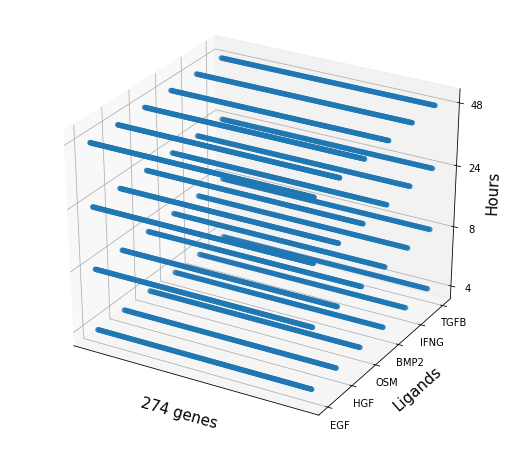

In [8]:
from mpl_toolkits.mplot3d import Axes3D

tensor_T = np.transpose(tensor,[1,2,0])
print('tensor size:',tensor_T.shape)
x,y,z = tensor_T.nonzero()
fig = plt.figure(figsize=(9,8))
fig.clf()
ax = fig.add_subplot(111, projection='3d')
ax.set_xticks([])
# ax.set_yticks([0,1,2,3,4,5])
# ax.set_zticks([0,1,2,3,4])
ax.set(yticks=range(tensor_T.shape[1]), yticklabels=ligand_names,
#        zticks=range(tensor_T.shape[2]), zticklabels=['4','8','24','48']) 
       zticks=range(tensor_T.shape[2]), zticklabels=['4','8','24','48']) 
ax.set_xlabel(str(tensor_T.shape[0])+' genes', fontsize=15)
ax.set_ylabel('Ligands', fontsize=15)
ax.yaxis.labelpad=10
ax.set_zlabel('Hours', fontsize=15)
c = (z<=0)
ax.scatter(x, y, z, cmap='cm.coolwarm')

## Find the best number of components with corcondia (Core Consistency Diagnostic, https://rdrr.io/cran/multiway/man/corcondia.html)

* A value of 100 indiciates a perfect multilinear structure, and smaller values indicate greater violations of multilinear structure.

## Calculating core consistency with R package 

In [9]:
from numpy.linalg import norm
def compute_namda(A, B, C):
    K = A.shape[1]
    namda = 1
    for r in range(K):
        A_r = A[:,r]
        B_r = B[:,r]
        C_r = C[:,r]
        namda *= norm(A_r)*norm(B_r)*norm(C_r)
    return namda

In [10]:
# Method1: rank the core consistency rigidly following Panisson's paper
def rank_(cc_values, namdas, k):
    top_50percent = int(len(cc_values)/2)
    top_idx = np.argsort(cc_values)[-top_50percent:]
    cc_values_selected = cc_values[top_idx]
    namdas_selected = namdas[top_idx]
    top_idx = np.argsort(namdas_selected)[-k:]
    return cc_values_selected[top_idx]

In [11]:
# Method 2: rank the core consistency with top-k returned
def rank_k(cc_values, namdas, k):
    top_50percent = int(len(cc_values)/2)
    top_idx = np.argsort(cc_values)[-k:]
    return cc_values[top_idx]

In [12]:
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
importr('multiway')
parafac = robjects.r["parafac"]
corcondia = robjects.r["corcondia"]
import tensorly as tl

iters = 100
num_k = 11
start = 2
cc_values = {}
cc_factors = {}
for i in range(iters):
    for k in range(start, num_k):
        pfac = parafac(tensor, nfac=k, nstart=1)
        A_f = np.array(pfac[pfac.names.index('A')])
        B_f = np.array(pfac[pfac.names.index('B')])
        C_f = np.array(pfac[pfac.names.index('C')])
        namda = compute_namda(A_f, B_f, C_f)
        if k not in cc_values.keys():
            cc_values[k] = [corcondia(tensor, pfac, divisor = ["core", "nfac"])[0]]
            cc_factors[k] = [namda]
        else:
            cc_values[k].append(corcondia(tensor, pfac, divisor = ["core", "nfac"])[0])
            cc_factors[k].append(namda)

In [13]:
import statistics 
top_k = 20
ys = []
ys_average = []
for k in range(start, num_k):
    ccvs = np.array(cc_values[k])
    ccfs = np.array(cc_factors[k])
    top_ccs = rank_k(ccvs, ccfs, top_k)
    ys.append(top_ccs)
    ys_average.append(statistics.mean(top_ccs))
    print(k, top_ccs)
ys = np.array(ys)

2 [69.62531873 73.12213558 74.30566219 79.46694915 80.38766399 80.75217079
 80.90235568 84.52690886 84.66426231 86.66760827 87.04727744 88.47093083
 90.28674948 92.39792482 94.49912482 94.90556157 94.9578746  96.88748786
 97.50857139 97.72838919]
3 [32.41032591 32.60405095 33.39797309 37.84839767 38.52407189 38.77738873
 41.86002865 46.67056961 47.95123481 49.69450547 50.02039496 51.49670897
 52.57962181 52.81114378 53.8363385  59.45028317 64.06888707 64.71878899
 69.23789105 72.5883779 ]
4 [10.88220936 11.08514641 11.14317116 11.15479306 11.18610377 11.27518956
 11.53404926 11.85997943 11.98322392 12.29192352 13.83365616 14.05078885
 14.1130234  14.27379151 14.66701819 16.87343786 17.30821559 20.45636263
 20.74101586 25.60383818]
5 [ 2.23492497  2.51348477  2.72188042  2.75829984  2.88988413  3.32464883
  3.59219392  3.98793414  4.05856659  4.48956298  4.95890413  5.3188
  5.55160726  5.81777034  5.94701989  7.11614022  7.78032258  9.53888393
 10.35853997 10.85744175]
6 [0.28435757 0.

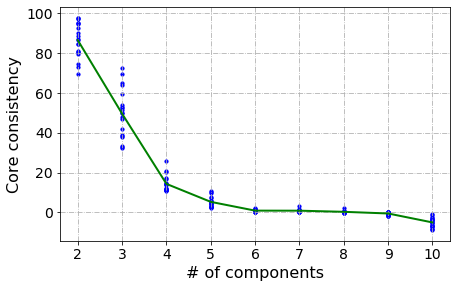

In [14]:
# xyz=np.array(np.random.random((100,3)))
# plt.scatter(xyz[1,:], xyz[1,:])
xs = np.array([list(range(start, num_k))] * top_k).T
xs_average = list(range(start, num_k))
# xs
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.scatter(xs, ys, 10, c='blue')

linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(xs_average, ys_average, color="green", **linestyle, fmt='-')

plt.xlabel("# of components", fontsize=16)
plt.ylabel("Core consistency", fontsize=16)
plt.grid(linestyle='-.')

In [15]:
pairs = pd.DataFrame([xs_average,ys_average])
# pairs = pairs.set_index(0).rename_axis(None)
# pairs.columns = [[''],['']]
print("Number of K vs. Core consistency")
pairs

Number of K vs. Core consistency


,0,1,2,3,4,5,6,7,8
0,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000
1,86.455546,49.527349,14.315847,5.290841,0.894825,0.866239,0.300749,-0.537494,-5.033557


In [4]:
# tensor.shape

In [3]:
# importr('NbClust')
# nbclust = robjects.r["NbClust"]

# combine all tensor layers as one (add up all the layers)
# combined_layer = np.sum(tensor, axis=0)
# print(combined_layer.shape)
# combined_layer

# res = nbclust(tensor, distance = "euclidean", min_nc=2, max_nc=10,
#             method = "ward.D", index = "ch")

In [2]:
# res[res.names.index('Best.partition')]

In [1]:
# res

## none-negative tensor decomposition

## Based on above curve, I choose K=2

In [9]:
import tensorly as tl
from tensorly.decomposition import non_negative_parafac

num_component = 2
print('tensor{}'.format(tensor.shape),'= component_1 + component_2 + ... + component_{}= [A,B,C]'.format(num_component))
weights, factors = non_negative_parafac(tensor, rank=num_component, init='svd')

C = np.array(factors[0])
A = np.array(factors[1])
B = np.array(factors[2])
print('[A,B,C]:', A.shape, B.shape, C.shape)

print(C)
print(B)

tensor(4, 274, 6) = component_1 + component_2 + ... + component_2= [A,B,C]
[A,B,C]: (274, 2) (6, 2) (4, 2)
[[ 0.3616957  10.44275769]
 [ 0.55445529 12.63038569]
 [11.51072858 12.9170503 ]
 [22.34001989  2.37329569]]
[[0.50772447 0.37993168]
 [0.345061   0.23031997]
 [0.35639148 0.36841495]
 [0.46203195 0.37692136]
 [0.37863899 0.47816986]
 [0.50213584 0.46997647]]


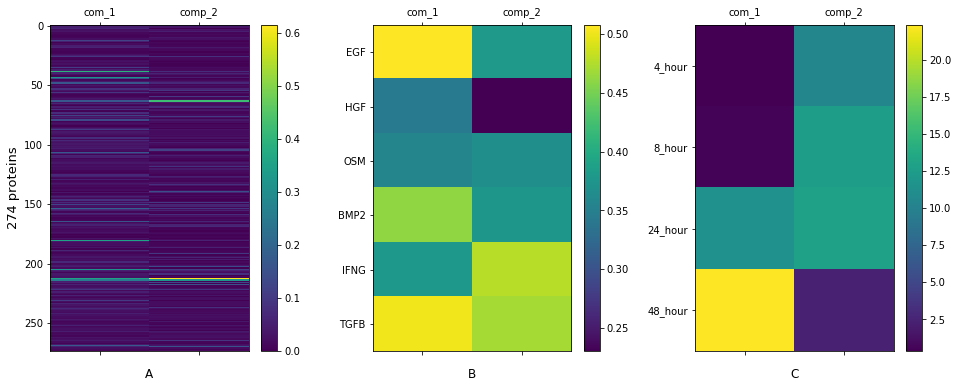

In [10]:


fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0, wspace=0.3)

ax1 = fig.add_subplot(131)
cax1 = ax1.matshow(A)
ax1.set_aspect('auto')
ax1.set_title('A', y=-0.1)
fig.colorbar(cax1)
ax1.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
ax1.set_xticklabels(['','com_1', 'comp_2', 'comp_3'])

ax2 = fig.add_subplot(132)
cax2 = ax2.matshow(B)
ax2.set_aspect('auto')
ax2.set_title('B', y=-0.1)
fig.colorbar(cax2)
# ax2.set_ylabel(str(tensor.shape[2])+" ligands", size=(13))
ax2.set_yticklabels(ligand_names.insert(0,''))
ax2.set_xticklabels(['','com_1', 'comp_2', 'comp_3'])

ax3 = fig.add_subplot(133)
cax3 = ax3.matshow(C)
ax3.set_aspect('auto')
ax3.set_title('C', y=-0.1)
# ax3.set_ylabel(tensor.shape[0], size=(13))
# ax3.set_yticklabels(['','4_hour','8_hour','24_hour','48_hour'])
ax3.set_yticklabels(['','4_hour','8_hour','24_hour','48_hour'])
ax3.set_xticklabels(['','com_1', 'comp_2', 'comp_3'])

fig.colorbar(cax3)

# Step 4. Results Interpretation (RPPA data) 

In [11]:
component_preds = A.argmax(axis=1) # classify proteins into respective components based on the largest membership values
print('{} proteins in total, each protein belongs to a predicted component with the largest membership value:\n\n'.format(A.shape[0]), component_preds)

component_preds_B = B.argmax(axis=1) # classify proteins into respective components based on the largest membership values
print('{} proteins in total, each protein belongs to a predicted component with the largest membership value:\n\n'.format(B.shape[0]), component_preds_B)


274 proteins in total, each protein belongs to a predicted component with the largest membership value:

 [1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1
 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1]
6 proteins in total, each protein belongs to a predicted component with the largest membership value:

 [0 0 1 0 1 0]


['0~167', '168~273']
(6, 274, 4)


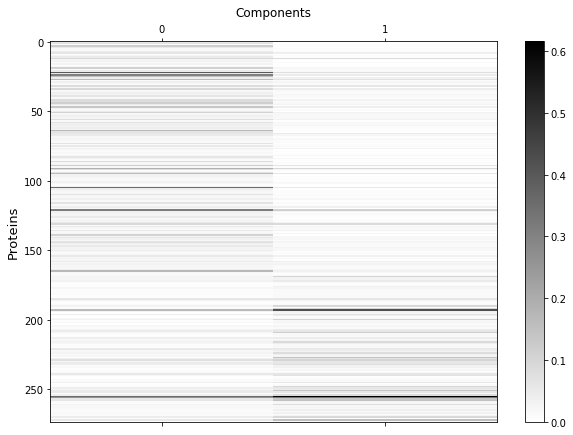

In [12]:
# rerange the proteins in matrix A
new_indexes = []
clusters = []
for k in range(num_component):
    idx = np.where(component_preds == k)[0]
    new_indexes.extend(idx)
    clusters.append(idx)

clustre_id_ranges = []
count = 0
for clu in clusters:
    id_range = str(count) + '~' + str(count+len(clu)-1)
    clustre_id_ranges.append(id_range)
    count += len(clu)
print(clustre_id_ranges)

# rank communities as a diagonal matrix
A_ranked = A[new_indexes]
protein_names_ranked = protein_names[new_indexes]
tensor_binary = rppa_averaged_binary.to_numpy()[new_indexes].reshape([rppa_averaged.shape[0],6,4]).transpose([1, 0, 2])
print(tensor_binary.shape)

fig = plt.figure(figsize=(10,7))
# fig.subplots_adjust(hspace=0, wspace=0.3)
ax = fig.add_subplot(111)
aa = ax.matshow(A_ranked,cmap=plt.cm.gray_r)
ax.set_aspect('auto')
ax.set_title('Components')
ax.set_ylabel('Proteins', size=(13))
ax.set_xticks(range(0,num_component))
fig.colorbar(aa)

In [13]:
new_indexes_B = []
clusters_B = []
for k in range(num_component):
    idx = np.where(component_preds_B == k)[0]
    new_indexes_B.extend(idx)
    clusters_B.append(idx)

clustre_id_ranges_B = []
count = 0
for clu in clusters_B:
    id_range = str(count) + '~' + str(count+len(clu)-1)
    clustre_id_ranges_B.append(id_range)
    count += len(clu)
print(clustre_id_ranges_B)

# rank communities as a diagonal matrix
# B_ranked = B[new_indexes_B]
# ligand_names_ranked = ligand_names[new_indexes_B]
B_ranked = B
ligand_names_ranked = ligand_names
B_ranked
ligand_names_ranked

['0~3', '4~5']


Index(['EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB'], dtype='object')

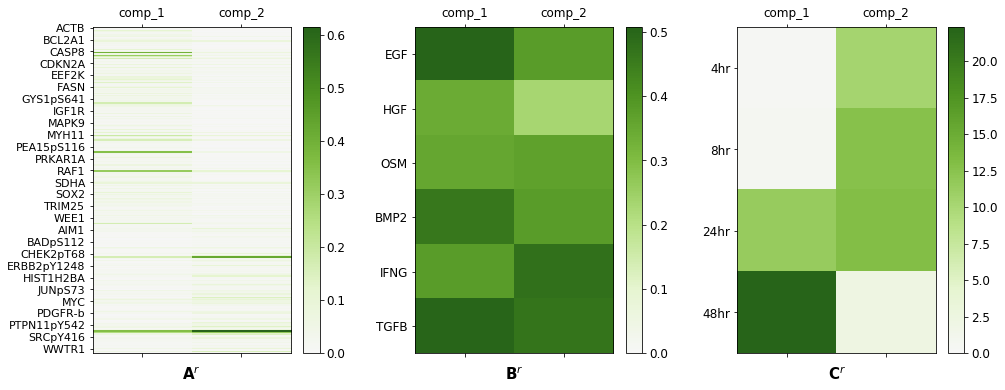

In [14]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0, wspace=0.3)

ax1 = fig.add_subplot(131)
plt.set_cmap('PiYG')
norm = colors.DivergingNorm(vcenter=0)
cax1 = ax1.matshow(A_ranked,norm=norm)
ax1.set_aspect('auto')
ax1.set_title('$\mathbf{A}^r$', y=-0.1, fontsize=15)
plt.rc('ytick',labelsize=12)
fig.colorbar(cax1)

# ax1.set_ylabel(str(tensor.shape[1])+' proteins', fontsize=14)
ax1.set_yticks(range(len(protein_names_ranked)))
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax1.yaxis.set_major_locator(loc)
show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 10)].insert(0,'')
ax1.set_yticklabels(show_protein_names, fontsize=11)

ax1.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

ax2 = fig.add_subplot(132)

plt.set_cmap('PiYG')
cax2 = ax2.matshow(B_ranked,norm =colors.DivergingNorm(vcenter=0))
ax2.set_aspect('auto')
ax2.set_title('$\mathbf{B}^r$', y=-0.1, fontsize=15)
fig.colorbar(cax2)
plt.rc('ytick',labelsize=12)
# ax2.set_ylabel(str(tensor.shape[2])+" ligands", size=(13))
ax2.set_yticklabels(ligand_names_ranked.insert(0,''))
ax2.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

ax3 = fig.add_subplot(133)
cax3 = ax3.matshow(C, cmap='PiYG', norm =colors.DivergingNorm(vcenter=0))
ax3.set_aspect('auto')
ax3.set_title('$\mathbf{C}^r$', y=-0.1, fontsize=15)
plt.rc('ytick',labelsize=12)
# ax3.set_ylabel(tensor.shape[0], size=(13))
ax3.set_yticklabels(['', '4hr','8hr','24hr','48hr'])
ax3.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

fig.colorbar(cax3)

# import Image
# fig.savefig('testplot.png')
# Image.open('testplot.png').save('testplot.jpg','JPEG')

In [18]:
# save the A,B and C matrices
A_out = pd.DataFrame(data=A_ranked, index=protein_names_ranked, columns=['com_1','com_2'])
B_out = pd.DataFrame(data=B_ranked, index=ligand_names_ranked, columns=['com_1','com_2'])
C_out = pd.DataFrame(data=C, index=['4_hour','8_hour','24_hour','48_hour'], columns=['com_1','com_2'])


writer = pd.ExcelWriter("dataset/PLOS_results_2021-4-20/Tensorly/rppa/Factors_rppa_tensorly.xlsx")

A_out.to_excel(writer, "A")
B_out.to_excel(writer, "B")
C_out.to_excel(writer, "C")

writer.save()

In [19]:

for k in range(len(clusters)):
    proteins = ' '.join(protein_names_ranked[clusters[k]])
    print('Protein cluster {}: {}\n'.format(k, proteins))

Protein cluster 0: AKT1S1 ARAF ATRpS428 BIRC3 BRAFpS445 BRD4 C12ORF5 CASP3 CASP7 CCND1 CDC25C CDK1pY15 CDKN1A CDKN2A CHEK1pS296 CHEK1 CHEK2 CLDN7 CMC2 CREB1 CTNNB1 DIABLO EEF2 EEF2K EPPK1 ERBB2 ERCC5 ERRFI1 FASN FOXM1 FOXO3pS318S321 FOXO3 G6PD GJA1 GLS GLUD1 GYS1 H2AFXpS140 H3K9ME2 HSBP1pS82 HSBP1 IGF1R IRS1 LCK LRP6pS1490 MAPK3 MAPK8pT183Y185 MAPK9 MKNK1 MMP2 MSI2 MTOR MUC1 MYH11 MYH2pS1943 MYT1 PAR-2 PARP1 PDHK1 PDPK1pS241 PEA15pS116 PEA15 PGR PIK3CB POU5F1 PPIF PRKAR1A PRKCA PTGS3 PTK2 PTPRC RAF1 RPA2pS4S8 RPS6 SCD SDHA SERPINE1 SLC16A4 SMAD3 SMAD4 SOD1 SRC SRSF1 STAT3 STAT5A STMN1 TFAM TFRC TRIM25 TSC1 TTF1 TUBA1A TWIST1 UBAC1 UGT1A YAP1 YWHAZ AIM1 AKT AKT1S1pT246 AKTpS473 AKTpT308 ANXA1 AR BABAM1pS29 BAK1 BAX BECN1 BID CCND3 CDH3 CHEK2pT68 DUSP4 E2F1 EGFR EIF4EBP1_XBP ENY2 ERBB2pY1248 ERCC1 ERCC4 ESR1 GATA6 GSK3BpS21S9 HIST1H2BA HK2 HSPA1A INSRB ITGA2 JAK2 JUNpS73 L1CAM LC3AB MAP2K1pS217S221 MAPK1pT202Y204 MAPK14pT180Y182 MAPT MCL1 MDM2pS166 MYC NDRG1pT346 NOTCH1 NRAS NRG1 PAK1 PA

## Fold Change Pattern mining 

# combine A and B

(274, 6)
mean:0.029684302642596534, std:0.039378544850940056


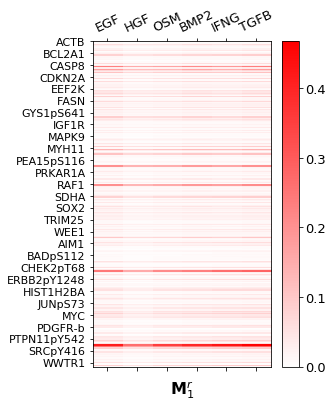

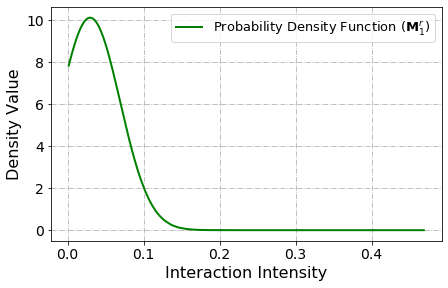

In [20]:
B_expand = np.expand_dims(B_ranked, axis=1)
patterns_AB = np.sum(np.transpose(np.multiply(A_ranked, B_expand), [1,0,2]), axis=2)
print(patterns_AB.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_AB,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(16))
ax.set_yticks(range(len(protein_names_ranked)))
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 10)].insert(0,'')
ax.set_yticklabels(show_protein_names, fontsize=11)

plt.rc('ytick',labelsize=13)
ax.set_xticklabels(ligand_names_ranked.insert(0,''), fontsize=13, rotation =25)
ax.set_title('$\mathbf{M}_1^r$', y=-0.1, fontsize=16)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_AB = patterns_AB.flatten()
flatten_AB.sort()
mean, std = norm.fit(flatten_AB)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf = norm.pdf(flatten_AB, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_AB, fitted_pdf, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_1^r$)'], fontsize=13)
plt.grid(linestyle='-.')


writer_intensity = pd.ExcelWriter("dataset/PLOS_results_2021-4-20/Tensorly/rppa/Intensity_dist_rppa_tensorly.xlsx")

intense_density = np.concatenate([flatten_AB, fitted_pdf]).reshape(2,flatten_AB.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity, "M1_AB")
writer_intensity.save()

# start_ind = 175
# patterns_AB_part = patterns_AB[start_ind:]

# num_protein = patterns_AB.shape[0]
# pairs = pd.DataFrame(data=patterns_AB_part, index=range(start_ind, num_protein), columns=ligand_names_ranked)
# s = pd.Series(range(start_ind, num_protein))
# pairs= pairs.set_index([s, protein_names_ranked[s]])
# pairs

# combine A and C

(274, 4)
mean:0.6615537456268514, std:1.0238082152500867


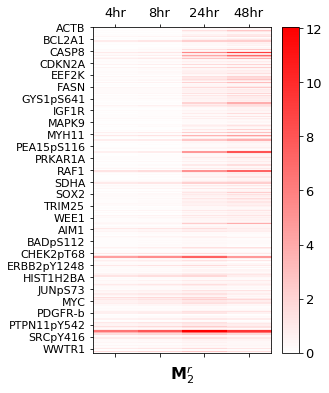

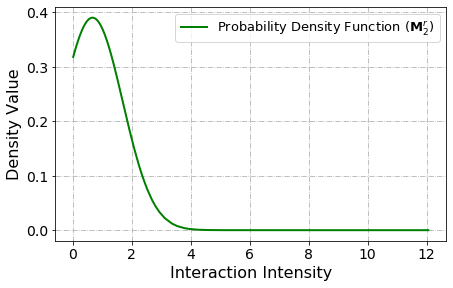

In [21]:
C_expand = np.expand_dims(C, axis=1)
patterns_AC = np.sum(np.transpose(np.multiply(A_ranked, C_expand), [1,0,2]), axis=2)
print(patterns_AC.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_AC,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(16))

ax.set_yticks(range(len(protein_names_ranked)))
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 10)].insert(0,'')
ax.set_yticklabels(show_protein_names, fontsize=11)

plt.rc('ytick',labelsize=13)

# ax.set_xticks(range(0,num_component))
# ax.set_xticklabels(['','4_hour','8_hour','24_hour','48_hour'])
ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=13)
ax.set_title('$\mathbf{M}_2^r$', y=-0.1, fontsize=16)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_AC = patterns_AC.flatten()
flatten_AC.sort()
mean, std = norm.fit(flatten_AC)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf = norm.pdf(flatten_AC, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_2^r$)'],fontsize=13)
plt.grid(linestyle='-.')

patterns_AC_pairs_new = pd.DataFrame(data=patterns_AC, index=protein_names_ranked, 
                                     columns=['4_hour','8_hour','24_hour','48_hour'])


intense_density = np.concatenate([flatten_AC, fitted_pdf]).reshape(2,flatten_AC.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity, "M2_AC")
writer_intensity.save()

# start_ind = 230
# patterns_AC_part = patterns_AC[start_ind:]

# num_protein = patterns_AC.shape[0]
# pairs = pd.DataFrame(data=patterns_AC_part, index=range(start_ind, num_protein), 
# #                      columns=['4_hour','8_hour','24_hour','48_hour'])
#                      columns=['1_hour','4_hour','8_hour','24_hour','48_hour'])
# s = pd.Series(range(start_ind, num_protein))
# pairs= pairs.set_index([s, protein_names_ranked[s]])
# pairs

(274, 4)
EGF, mean:0.1789997546053932, std:1.2057345096735406
HGF, mean:0.2059489192441847, std:1.2014248468500375
OSM, mean:0.21699297383180013, std:1.1994793325748117
BMP2, mean:0.18282507384436883, std:1.205160409381376
IFNG, mean:0.17481779552403653, std:1.2063479424836767
TGFB, mean:0.18138808178715038, std:1.20537752747928


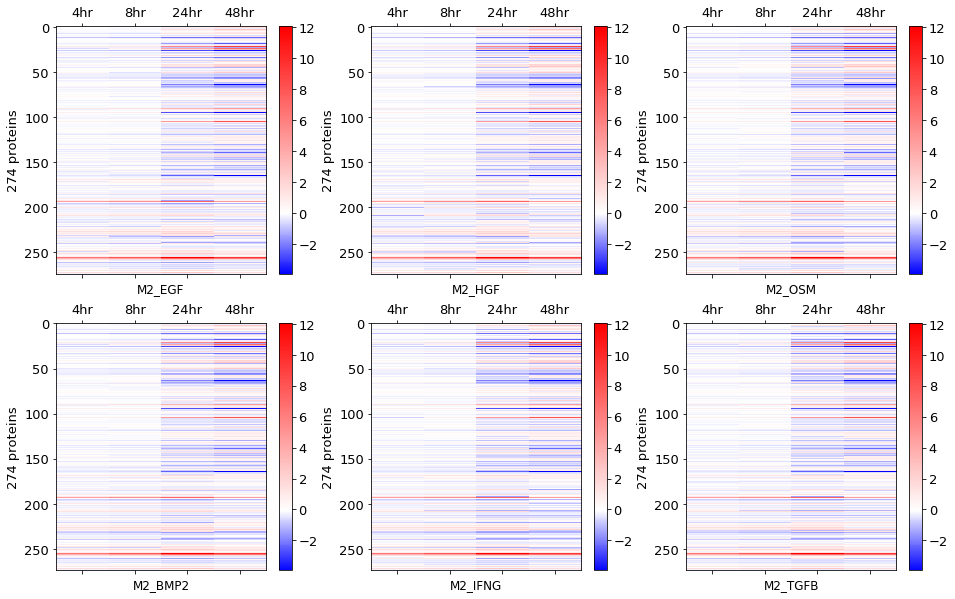

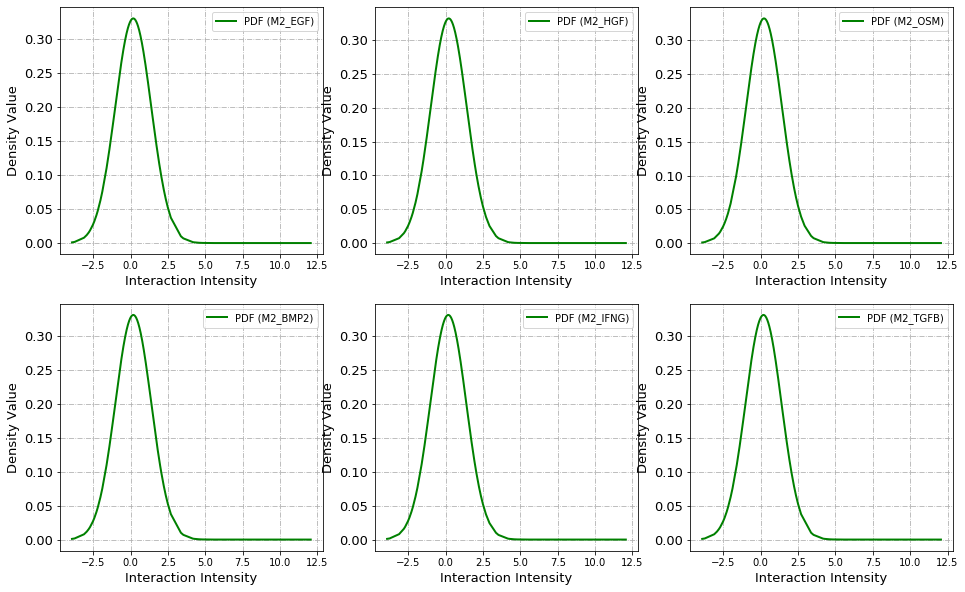

In [30]:
from matplotlib import colors

C_expand = np.expand_dims(C, axis=1)
patterns_AC = np.sum(np.transpose(np.multiply(A_ranked, C_expand), [1,0,2]), axis=2)
print(patterns_AC.shape)

patterns_AC_by_lignad = tensor_binary * patterns_AC

norm = colors.DivergingNorm(vcenter=0)
fig = plt.figure(figsize=(16,10))
plt.set_cmap('bwr')
for i in range(patterns_AC_by_lignad.shape[0]):
    ax = fig.add_subplot(2,3,i+1)
    aa = ax.matshow(patterns_AC_by_lignad[i], norm=norm)
    ax.set_aspect('auto')
    ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
    ax.set_xticklabels(['','4hr','8hr','24hr','48hr'],fontsize=13)
    ax.set_title('M2_'+str(ligand_names_ranked[i]), y=-0.1)
    fig.colorbar(aa)


# fig = plt.figure(figsize=(10,7))
# ax = fig.add_subplot(111)
# aa = ax.matshow(patterns_AC,cmap=plt.cm.gray_r)
# ax.set_aspect('auto')
# # ax.set_title('Components')
# ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
# # ax.set_xticks(range(0,num_component))
# ax.set_xticklabels(['','1_hour','4_hour','8_hour','24_hour','48_hour'])
# # ax.set_xticklabels(['','4_hour','8_hour','24_hour','48_hour'])
# ax.set_title('M2', y=-0.1)
# fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
# fig = plt.figure(figsize=(7, 4.3))
# ax = fig.add_subplot(111)
# ax.tick_params(axis='both', which='major', labelsize=14)


intensity_dist_rppa_mats = []
fig = plt.figure(figsize=(16,10))
plt.set_cmap('bwr')
for i in range(patterns_AC_by_lignad.shape[0]):
    ax = fig.add_subplot(2,3,i+1)
#     ax.tick_params(axis='both', which='major', labelsize=14)
    flatten_AC = patterns_AC_by_lignad[i].flatten()
    flatten_AC.sort()
    mean, std = norm.fit(flatten_AC)
    
    print('{}, mean:{}, std:{}'.format(ligand_names_ranked[i], mean, std))
    fitted_pdf = norm.pdf(flatten_AC, loc=mean, scale=std)
    
    intense_density = np.concatenate([flatten_AC, fitted_pdf]).reshape(2,flatten_AC.shape[0]).transpose([1,0])
    intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
    intense_density_mat.loc[-1] = [mean, std]
    intense_density_mat.index = intense_density_mat.index + 1
    intense_density_mat = intense_density_mat.sort_index()
    intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
    intense_density_mat.to_excel(writer_intensity, "M2_AC_per_ligand_"+ligand_names_ranked[i])
    writer_intensity.save()
    
    linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
    plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')
    plt.xlabel("Interaction Intensity", fontsize=13)
    plt.ylabel("Density Value", fontsize=13)
    plt.legend(['PDF (M2_'+str(ligand_names_ranked[i])+")"])
    plt.grid(linestyle='-.')
    
    

# flatten_AC = patterns_AC.flatten()
# flatten_AC.sort()
# mean, std = norm.fit(flatten_AC)
# print('mean:{}, std:{}'.format(mean, std))

# fitted_pdf = norm.pdf(flatten_AC, loc=mean, scale=std)
# linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
# plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')
# plt.xlabel("Interaction Intensity", fontsize=16)
# plt.ylabel("Density Value", fontsize=16)
# plt.legend(['Probability Density Function (M2)'])
# plt.grid(linestyle='-.')

# start_ind = 169
# patterns_AC_part = patterns_AC[start_ind:]

# num_protein = patterns_AC.shape[0]
# pairs = pd.DataFrame(data=patterns_AC_part, index=range(start_ind, num_protein), 
# #                      columns=['4_hour','8_hour','24_hour','48_hour'])
#                      columns=['1_hour','4_hour','8_hour','24_hour','48_hour'])
# s = pd.Series(range(start_ind, num_protein))
# pairs= pairs.set_index([s, protein_names_ranked[s]])
# pairs

# combine B and C

(6, 4)
mean:7.37932701611868, std:3.075921006236172


,,4_hour,8_hour,24_hour,48_hour
0,EGF,4.151176,5.080194,10.751875,12.244265
1,HGF,2.529983,3.100351,6.946958,8.255287
2,OSM,3.976173,4.850826,8.861160,8.836150
3,BMP2,4.103213,5.016838,10.187037,11.216349
4,IFNG,5.130364,6.249408,10.534955,9.593641
5,TGFB,5.089471,6.214396,11.850659,12.333118


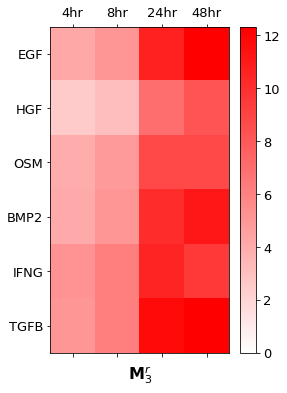

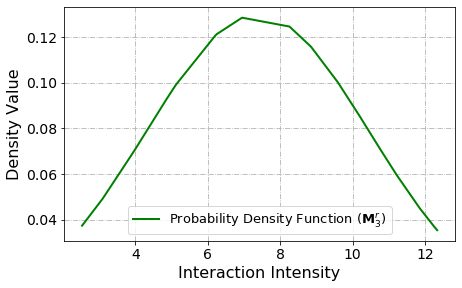

In [22]:
C_expand = np.expand_dims(C, axis=1)
patterns_BC = np.sum(np.transpose(np.multiply(B_ranked, C_expand), [1,0,2]), axis=2)
print(patterns_BC.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_BC,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
# ax.set_xticks(range(0,num_component))
ax.set_yticklabels(ligand_names_ranked.insert(0,''), size=(13))



ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=13)
# ax.set_xticklabels(['','4_hour','8_hour','24_hour','48_hour'])
ax.set_title('$\mathbf{M}_3^r$', y=-0.1, fontsize=16)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_BC = patterns_BC.flatten()
flatten_BC.sort()
mean, std = norm.fit(flatten_BC)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf = norm.pdf(flatten_BC, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_BC, fitted_pdf, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_3^r$)'],fontsize=13)
plt.grid(linestyle='-.')


intense_density = np.concatenate([flatten_BC, fitted_pdf]).reshape(2,flatten_BC.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity, "M3_BC")
writer_intensity.save()


patterns_BC_part = patterns_BC

num_ligand = patterns_BC.shape[0]
pairs = pd.DataFrame(data=patterns_BC_part, index=range(0,num_ligand), 
#                      columns=['4_hour','8_hour','24_hour','48_hour'])
                     columns=['4_hour','8_hour','24_hour','48_hour'])
s = pd.Series(range(num_ligand))
pairs= pairs.set_index([s, ligand_names_ranked[s]])
pairs

In [25]:
# save M1, M2 and M3 into files
num_protein = patterns_AB.shape[0]
patterns_AB_pairs = pd.DataFrame(data=patterns_AB, index=protein_names_ranked, columns=ligand_names_ranked)

# patterns_AC_pairs = pd.concat([pd.DataFrame(x, index=protein_names_ranked, 
#                              columns=['4_h','8_h','24_h','48_h']) for x in patterns_AC_by_lignad], 
#                axis=1,
#               keys=ligand_names_ranked)

num_ligand = patterns_BC.shape[0]
patterns_BC_pairs = pd.DataFrame(data=patterns_BC, index=ligand_names_ranked, 
#                      columns=['4_hour','8_hour','24_hour','48_hour'])
                     columns=['4_hour','8_hour','24_hour','48_hour'])

writer = pd.ExcelWriter("dataset/PLOS_results_2021-4-20/Tensorly/rppa/M_rppa_tensorly.xlsx")

patterns_AB_pairs.to_excel(writer, "M1_AB")
patterns_AC_pairs_new.to_excel(writer, "M2_AC")
# patterns_AC_pairs.to_excel(writer, "M2_AC_per_ligands")
patterns_BC_pairs.to_excel(writer, "M3_BC")

writer.save()

In [26]:
writer_mean = pd.ExcelWriter("dataset/PLOS_results_2021-4-20/Tensorly/rppa/Correlation_by_cutoff_rppa_tensorly.xlsx")

# EGF, mean:0.15555209319678875, std:1.0986046468620025
# HGF, mean:0.1802341320119018, std:1.0948261421169134
# OSM, mean:0.18876933326498685, std:1.0933868311916786
# BMP2, mean:0.16018680301465896, std:1.097938437228896
# IFNG, mean:0.1540946158511768, std:1.0988100259691689
# TGFB, mean:0.1583843078965131, std:1.0981999065820531


M1_mean = 0.029684302642596534
M2_mean = 0.6615537456268514
# M2_means = [0.04078242101516822, 0.03957527771656577, 0.04010555263978096, 
#               0.04395054561876215, 0.04743247114338529, 0.0394675649134697]
M3_mean = 7.37932701611868

#-----------------------center_MeanElbow-------------
M1_cutoff = 0.075709749 - M1_mean
M2_cutoff = 2.052200312 - M2_mean
# M2_cutoffs = np.array([0.404407521,0.402916509,0.402916509,0.405481335,0.405481335,0.402916509]) - np.array(M2_means)
M3_cutoff = 10.18703653 - M3_mean

AB_stack = patterns_AB_pairs.T.stack().to_frame()
AB_stack.columns = ['Itensity']
AB_stack_sorted = AB_stack[~((AB_stack.values-M1_mean < M1_cutoff))]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted.to_excel(writer_mean, 'M1_center_MeanElbow')
writer_mean.save()


AC_stack = patterns_AC_pairs_new.T.stack().to_frame()
AC_stack.columns = ['Itensity']
AC_stack_sorted = AC_stack[~((AC_stack.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted.to_excel(writer_mean, 'M2_center_MeanElbow')
writer_mean.save()


# AC_stack = patterns_AC_pairs.T.stack().to_frame()
# AC_stack.columns = ['Itensity']

# left_rows = ~(((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) < M2_cutoffs[0]) &
#             ((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) > -M2_cutoffs[0]))
# for i in range(1,len(M2_cutoffs)):
#      left_rows=np.concatenate((left_rows,~(((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) < M2_cutoffs[i]) &
#             ((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

# AC_stack_sorted = AC_stack[left_rows]#.sort_values(by='Itensity',ascending=False)
# AC_stack_sorted.to_excel(writer_mean, 'M2_per_ligand_center_MeanElbow')
# writer_mean.save()

BC_stack = patterns_BC_pairs.T.stack().to_frame()
BC_stack.columns = ['Itensity']
BC_stack_sorted = BC_stack[~((BC_stack.values-M3_mean < M3_cutoff))]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted.to_excel(writer_mean, 'M3_center_MeanElbow')
writer_mean.save()

#------------------elbow-----------------
M1_cutoff = 0.121579889 - M1_mean
M2_cutoff = 2.800836104 - M2_mean
# M2_cutoffs = np.array([0.726040089, 0.726040089, 0.726040089, 0.72647128, 0.72647128, 0.72647128]) - np.array(M2_means)
M3_cutoff= 11.21634876 - M3_mean

AB_stack = patterns_AB_pairs.T.stack().to_frame()
AB_stack.columns = ['Itensity']
AB_stack_sorted = AB_stack[~((AB_stack.values-M1_mean < M1_cutoff))]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted.to_excel(writer_mean, 'M1_Elbow')
writer_mean.save()


AC_stack = patterns_AC_pairs_new.T.stack().to_frame()
AC_stack.columns = ['Itensity']
AC_stack_sorted = AC_stack[~((AC_stack.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted.to_excel(writer_mean, 'M2_Elbow')
writer_mean.save()


# AC_stack = patterns_AC_pairs.T.stack().to_frame()
# AC_stack.columns = ['Itensity']

# left_rows = ~(((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) < M2_cutoffs[0]) &
#             ((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) > -M2_cutoffs[0]))
# for i in range(1,len(M2_cutoffs)):
#      left_rows=np.concatenate((left_rows,~(((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) < M2_cutoffs[i]) &
#             ((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

# AC_stack_sorted = AC_stack[left_rows]#.sort_values(by='Itensity',ascending=False)
# AC_stack_sorted.to_excel(writer_mean, 'M2_per_ligand_Elbow')
# writer_mean.save()

BC_stack = patterns_BC_pairs.T.stack().to_frame()
BC_stack.columns = ['Itensity']
BC_stack_sorted = BC_stack[~((BC_stack.values-M3_mean < M3_cutoff))]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted.to_excel(writer_mean, 'M3_Elbow')
writer_mean.save()

#------------------asymptotic-----------------
M1_cutoff = 0.174964472 - M1_mean
M2_cutoff = 4.168476044 - M2_mean
# M2_cutoffs = np.array([0.920580446, 0.920580446, 0.920580446, 0.920580446, 0.920580446, 0.920580446]) - np.array(M2_means)
M3_cutoff=  12.24426507 - M3_mean

AB_stack = patterns_AB_pairs.T.stack().to_frame()
AB_stack.columns = ['Itensity']
AB_stack_sorted = AB_stack[~((AB_stack.values-M1_mean < M1_cutoff))]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted.to_excel(writer_mean, 'M1_Asymptotic')
writer_mean.save()


AC_stack = patterns_AC_pairs_new.T.stack().to_frame()
AC_stack.columns = ['Itensity']
AC_stack_sorted = AC_stack[~((AC_stack.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted.to_excel(writer_mean, 'M2_Asymptotic')
writer_mean.save()


# AC_stack = patterns_AC_pairs.T.stack().to_frame()
# AC_stack.columns = ['Itensity']

# left_rows = ~(((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) < M2_cutoffs[0]) &
#             ((AC_stack.loc[ligand_names_ranked[0]].values-M2_means[0]) > -M2_cutoffs[0]))
# for i in range(1,len(M2_cutoffs)):
#      left_rows=np.concatenate((left_rows,~(((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) < M2_cutoffs[i]) &
#             ((AC_stack.loc[ligand_names_ranked[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

# AC_stack_sorted = AC_stack[left_rows]#.sort_values(by='Itensity',ascending=False)
# AC_stack_sorted.to_excel(writer_mean, 'M2_per_ligand_Asymptotic')
# writer_mean.save()

BC_stack = patterns_BC_pairs.T.stack().to_frame()
BC_stack.columns = ['Itensity']
BC_stack_sorted = BC_stack[~((BC_stack.values-M3_mean < M3_cutoff))]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted.to_excel(writer_mean, 'M3_Asymptotic')
writer_mean.save()

# Step 5. Data processing (GCP_PBS data)

* 1) Combine multiple simialr/same colums or rows as one
* 2) Normalize the data
* 3) Organize data of multiple time points as a 3-way tensor

In [27]:
# gcppbs_file = os.path.join('data','GCP_PBS_Timepoint_specific_normalized.csv')
# gcp_sheet = pd.read_csv(gcppbs_file)
gcppbs_file = os.path.join('dataset/gcp/','LINCS_GCP_Plate72_annotated_minimized_2019-12-16_16-53-04_LVL3_preprocessed.xlsx')

gcp_sheet = pd.read_excel(gcppbs_file, sheet_name='two_NaN_histone_removed_T')


gcp_sheet_T = gcp_sheet.set_index('histone').T
gcp_sheet_T.index.name = gcp_sheet_T.columns.name
gcp_sheet_T.columns.name = None

# gcp_p005_file = os.path.join('data','gcp_p005.xlsx')
# gcp_p005 = pd.read_excel(gcp_p005_file, sheet_name='Sheet1').set_index('ligand')
gcp_p005_file = os.path.join('dataset/tumour_microenv_results_2020-9-3/gcp/','pval_005_gcp.xlsx')
gcp_p005 = pd.read_excel(gcp_p005_file, sheet_name='Sheet1').set_index('histone')

sig_histones = gcp_p005.index

gcp_sheet_T = gcp_sheet_T[gcp_sheet_T.index.isin(sig_histones)]

# gcp_averaged = gcp_sheet_T.groupby(gcp_sheet_T.columns, axis=1, sort=False).mean()

gcp_averaged = gcp_sheet_T.groupby(gcp_sheet_T.columns, axis=1, sort=False).mean()
time_conditions=['_4','_8','_24','_48']

# rppa_averaged=rppa_averaged.apply(lambda x:x.columns, axis=1)

for time_condition in time_conditions:
    time_m=gcp_averaged.columns.str.endswith(time_condition)
    conditions=gcp_averaged.columns[time_m&(~gcp_averaged.columns.str.contains('ctrl'))].unique()
    print (conditions)
    for condition in conditions:
        gcp_averaged[condition] = gcp_averaged[condition]-gcp_averaged['ctrl_0']


gcp_averaged = gcp_averaged.drop('ctrl_0',axis=1)

gcp_averaged_binary = gcp_averaged.copy(deep=True)

gcp_averaged_binary[gcp_averaged_binary < 0] = -1
gcp_averaged_binary[gcp_averaged_binary >= 0] = 1

gcp_averaged_binary 

Index(['BMP2_4', 'EGF_4', 'HGF_4', 'IFNG_4', 'OSM_4', 'TGFB_4'], dtype='object')
Index(['BMP2_8', 'EGF_8', 'HGF_8', 'IFNG_8', 'OSM_8', 'TGFB_8'], dtype='object')
Index(['BMP2_24', 'EGF_24', 'HGF_24', 'IFNG_24', 'OSM_24', 'TGFB_24'], dtype='object')
Index(['BMP2_48', 'EGF_48', 'HGF_48', 'IFNG_48', 'OSM_48', 'TGFB_48'], dtype='object')


,BMP2_24,BMP2_4,BMP2_48,BMP2_8,EGF_24,EGF_4,EGF_48,EGF_8,HGF_24,HGF_4,...,IFNG_48,IFNG_8,OSM_24,OSM_4,OSM_48,OSM_8,TGFB_24,TGFB_4,TGFB_48,TGFB_8
histone,,,,,,,,,,,,,,,,,,,,,
H3K4me0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
H3K4me1,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0
H3K4me2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
H3K4me3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
H3K4ac1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
H3K9me0K14ac0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,1.0
H3K9me1K14ac0,1.0,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0
H3K9me2K14ac0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
H3K9me3K14ac0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,...,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0


In [28]:
gcp_averaged_binary=gcp_averaged_binary[['EGF_4', 'HGF_4', 'OSM_4', 'BMP2_4', 'IFNG_4', 'TGFB_4',
       'EGF_8', 'HGF_8', 'OSM_8', 'BMP2_8', 'IFNG_8', 'TGFB_8',
       'EGF_24', 'HGF_24', 'OSM_24', 'BMP2_24', 'IFNG_24', 'TGFB_24',
       'EGF_48', 'HGF_48', 'OSM_48', 'BMP2_48', 'IFNG_48', 'TGFB_48']]

In [12]:
# gcp_averaged_binary=gcp_averaged_binary[['BMP2_4', 'EGF_4', 'HGF_4', 'IFNg_4', 'OSM_4', 'TGFb_4',
#                     'BMP2_8', 'EGF_8', 'HGF_8', 'IFNg_8', 'OSM_8', 'TGFb_8',
#                     'BMP2_24', 'EGF_24', 'HGF_24', 'IFNg_24', 'OSM_24', 'TGFb_24',
#                     'BMP2_48', 'EGF_48', 'HGF_48', 'IFNg_48', 'OSM_48', 'TGFb_48']]

In [29]:
gcp_sheet = pd.read_excel(gcppbs_file, sheet_name='two_NaN_histone_removed_T')

gcp_sheet_T = gcp_sheet.set_index('histone')

gcp_p005_file = os.path.join('dataset/tumour_microenv_results_2020-9-3/gcp/','pval_005_gcp.xlsx')
gcp_p005 = pd.read_excel(gcp_p005_file, sheet_name='Sheet1').set_index('histone')

sig_histones = gcp_p005.index

gcp_averaged = gcp_sheet_T.groupby(gcp_sheet_T.index, sort=False).mean()
gcp_averaged = gcp_averaged.drop(columns=gcp_averaged.columns[~gcp_averaged.columns.isin(sig_histones)])

gcp_averaged= gcp_averaged.reindex(['ctrl_0',
               'EGF_4', 'EGF_8', 'EGF_24', 'EGF_48',
               'HGF_4', 'HGF_8', 'HGF_24', 'HGF_48', 
               'OSM_4', 'OSM_8','OSM_24', 'OSM_48', 
               'BMP2_4','BMP2_8', 'BMP2_24', 'BMP2_48', 
               'IFNG_4', 'IFNG_8', 'IFNG_24','IFNG_48', 
               'TGFB_4', 'TGFB_8', 'TGFB_24', 'TGFB_48'
               ])


time_conditions=['_4','_8','_24','_48']
tensor_gcp = []
for time_condition in time_conditions:
    time_m=gcp_averaged.index.str.endswith(time_condition)
    conditions=gcp_averaged.index[time_m].unique()
    print (conditions)
    temp_ = []
    for condition in conditions:
        gcp_averaged.loc[condition] =  np.absolute(gcp_averaged.loc[condition]-gcp_averaged.loc['ctrl_0'])
        temp_.append(gcp_averaged.loc[condition].values)
    tensor_gcp.append(temp_)

gcp_averaged = gcp_averaged.drop('ctrl_0')
gcp_averaged

Index(['EGF_4', 'HGF_4', 'OSM_4', 'BMP2_4', 'IFNG_4', 'TGFB_4'], dtype='object', name='histone')
Index(['EGF_8', 'HGF_8', 'OSM_8', 'BMP2_8', 'IFNG_8', 'TGFB_8'], dtype='object', name='histone')
Index(['EGF_24', 'HGF_24', 'OSM_24', 'BMP2_24', 'IFNG_24', 'TGFB_24'], dtype='object', name='histone')
Index(['EGF_48', 'HGF_48', 'OSM_48', 'BMP2_48', 'IFNG_48', 'TGFB_48'], dtype='object', name='histone')


,H3K4me0,H3K4me1,H3K4me2,H3K4me3,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,H3K9ac1K14ac0,...,H4(4to17)K12ac1K16ac1me0,H4(4to17)K8ac1K12ac1K16ac1me0,H4(4to17)K5ac1K8ac1K12ac1me0,H4(4to17)K5ac1K8ac1K16ac1me0,H4(4to17)K5ac1K8ac1K12ac1K16ac1me0,H4(20to23)K20me0,H4(20to23)K20me1,H4(20to23)K20me2,H4(20to23)K20me3,H4(68-78)AltNorm
histone,,,,,,,,,,,,,,,,,,,,,
EGF_4,0.005189,0.102462,0.142473,0.042522,0.390137,0.059304,0.070186,0.002347,0.280993,0.606158,...,0.350052,0.331751,0.076066,0.122066,0.599714,0.132070,0.312391,0.074272,0.051213,0.012499
EGF_8,0.086678,0.111939,0.280827,0.100895,0.216283,0.211339,0.071838,0.063329,0.049978,0.386346,...,0.185459,0.615048,0.009598,0.306172,0.775847,0.094890,0.104046,0.053620,0.128810,0.417109
EGF_24,0.223106,0.281109,0.273537,0.264003,0.433674,0.420604,0.028852,0.055787,0.225889,0.426119,...,0.344892,0.825778,0.052686,0.304444,0.439811,2.223261,0.482560,0.033184,0.381484,0.057380
EGF_48,0.004515,0.198556,0.036742,0.119528,0.031935,0.558239,0.013928,0.188196,0.176220,0.271903,...,0.196100,0.124050,0.291725,0.593400,0.230611,2.241896,0.705756,0.429710,0.495047,0.013193
HGF_4,0.024316,0.074178,0.061779,0.045712,0.195519,0.074223,0.047587,0.248399,0.011224,0.212715,...,0.131023,0.030545,0.178566,0.284283,0.021835,0.246551,0.086720,0.243721,0.286773,0.045045
HGF_8,0.004635,0.107981,0.218471,0.045839,0.011002,0.121986,0.071587,0.184024,0.044755,0.047471,...,0.329229,0.095294,0.033425,0.291729,0.357728,0.566689,0.273667,0.180059,0.348673,0.061527
HGF_24,0.386092,0.513560,0.068638,0.112030,0.249552,0.419543,0.478255,1.205867,0.743394,0.146080,...,0.090761,0.104846,0.109685,0.380106,0.141093,1.456932,0.002902,0.028257,0.508465,0.319204
HGF_48,0.012235,0.032845,0.061358,0.068037,0.375796,0.024942,0.111836,0.034783,0.174525,0.217003,...,0.377567,0.312509,0.782549,0.445064,0.044094,1.963269,0.397150,0.132666,0.268674,0.029942
OSM_4,0.247830,0.072173,0.268635,0.232601,0.680333,0.081559,0.088208,0.093983,0.219389,0.439510,...,0.252287,0.362499,0.267216,0.296792,0.760192,0.367057,0.146322,0.111711,0.022805,0.169134


In [30]:


gcp_averaged_gen3dnet = gcp_averaged.loc[gcp_averaged.index[gcp_averaged.index.str.endswith('_24')].unique()]
gcp_averaged_gen3dnet

,H3K4me0,H3K4me1,H3K4me2,H3K4me3,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,H3K9ac1K14ac0,...,H4(4to17)K12ac1K16ac1me0,H4(4to17)K8ac1K12ac1K16ac1me0,H4(4to17)K5ac1K8ac1K12ac1me0,H4(4to17)K5ac1K8ac1K16ac1me0,H4(4to17)K5ac1K8ac1K12ac1K16ac1me0,H4(20to23)K20me0,H4(20to23)K20me1,H4(20to23)K20me2,H4(20to23)K20me3,H4(68-78)AltNorm
histone,,,,,,,,,,,,,,,,,,,,,
EGF_24,0.223106,0.281109,0.273537,0.264003,0.433674,0.420604,0.028852,0.055787,0.225889,0.426119,...,0.344892,0.825778,0.052686,0.304444,0.439811,2.223261,0.482560,0.033184,0.381484,0.057380
HGF_24,0.386092,0.513560,0.068638,0.112030,0.249552,0.419543,0.478255,1.205867,0.743394,0.146080,...,0.090761,0.104846,0.109685,0.380106,0.141093,1.456932,0.002902,0.028257,0.508465,0.319204
OSM_24,0.073122,0.067443,0.152042,0.183327,0.388057,0.257909,0.177095,0.267500,0.024019,0.329716,...,0.792219,0.812319,0.257154,0.151701,0.702433,1.588361,0.154219,0.312479,0.130352,0.019202
BMP2_24,0.016037,0.133631,0.253799,0.107283,0.311632,0.363285,0.386767,0.227265,0.189816,0.182654,...,0.478775,0.854077,0.306284,0.085207,0.449410,1.517242,0.080774,0.106296,0.432285,0.314552
IFNG_24,1.280049,1.375831,1.110764,1.235227,2.019113,0.064150,0.132947,0.141957,0.238221,1.017927,...,0.509379,0.622117,0.033483,0.033373,0.382976,2.121260,0.672847,0.007447,0.117560,0.123797
TGFB_24,0.735237,0.635841,0.487300,0.527218,1.373849,0.049141,0.152932,0.310670,0.088906,0.492245,...,0.965321,1.427837,0.507118,0.348662,0.837116,0.897532,0.289277,0.003563,0.380403,0.023534


In [15]:
writer_intensity_gcp = "C:/Users/shimi/Desktop/test_code2/gcp_24.csv"

gcp_averaged_gen3dnet.to_csv(writer_intensity_gcp)
# writer_intensity.save()

In [31]:
tensor_gcp = np.array(tensor_gcp)
print('Size of the GCP tensor:',tensor_gcp.shape)
histone_names = gcp_averaged.columns
ligand_names_gcp = ['EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB']
# sheet_combineds[4]
# tensor_gcp

Size of the GCP tensor: (4, 6, 58)


tensor size: (58, 6, 4)


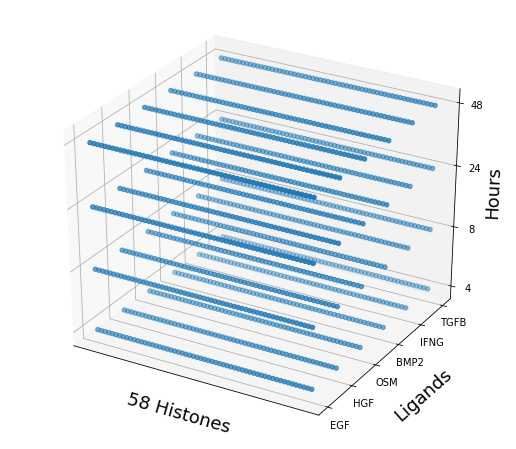

In [32]:
from mpl_toolkits.mplot3d import Axes3D
# construct the 3-way tensor
# matrices_gcp = []
# for idx, data in gcp_averaged.groupby(level=0):
#     matrices_gcp.append(data.to_numpy())
tensor_gcp_T = np.transpose(tensor_gcp,[2,1,0])
print('tensor size:',tensor_gcp_T.shape)
x,y,z = tensor_gcp_T.nonzero()
fig = plt.figure(figsize=(9,8))
fig.clf()
ax = fig.add_subplot(111, projection='3d')
ax.set_xticks([])
# ax.set_yticks([0,1,2,3,4,5])
# ax.set_zticks([0,1,2,3,4])
ax.set(yticks=range(tensor_gcp_T.shape[1]), yticklabels=ligand_names_gcp,
       zticks=range(tensor_gcp_T.shape[2]), zticklabels=['4','8','24','48']) 
ax.set_xlabel(str(tensor_gcp_T.shape[0])+' Histones', fontsize=18)
ax.set_ylabel('Ligands', fontsize=18)
ax.yaxis.labelpad=15
ax.set_zlabel('Hours', fontsize=18)
c = (z<=0)
ax.scatter(x, y, z, cmap='cm.coolwarm')

In [9]:
from numpy.linalg import norm
def compute_namda(A, B, C):
    K = A.shape[1]
    namda = 1
    for r in range(K):
        A_r = A[:,r]
        B_r = B[:,r]
        C_r = C[:,r]
        namda *= norm(A_r)*norm(B_r)*norm(C_r)
    return namda

In [34]:
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()
importr('multiway')
parafac = robjects.r["parafac"]
corcondia = robjects.r["corcondia"]
import tensorly as tl

tensor_gcp_t =  np.transpose(tensor_gcp,[0,2,1])

# # Usage: corcondia(tensor, components = 1)
# cc_values = {}
# for k in range(1, 50):
#     cc_values[k] = corcondia(dtensor(tensor_gcp_t), components = k)
    
    
iters = 100
num_k = 11
start = 2
cc_values = {}
cc_factors = {}
for i in range(iters):
    for k in range(start, num_k):
        pfac = parafac(tensor_gcp_t, nfac=k, nstart=1, output='best')
        A_f = np.array(pfac[pfac.names.index('A')])
        B_f = np.array(pfac[pfac.names.index('B')])
        C_f = np.array(pfac[pfac.names.index('C')])
        namda = compute_namda(A_f, B_f, C_f)
        if k not in cc_values.keys():
            cc_values[k] = [corcondia(tensor_gcp_t, pfac, divisor = ["core", "nfac"])[0]]
            cc_factors[k] = [namda]
        else:
            cc_values[k].append(corcondia(tensor_gcp_t, pfac, divisor = ["core", "nfac"])[0])
            cc_factors[k].append(namda)

NameError: name 'compute_namda' is not defined

In [40]:
import statistics 
top_k = 20
ys = []
ys_average = []
for k in range(start, num_k):
    ccvs = np.array(cc_values[k])
    ccfs = np.array(cc_factors[k])
    top_ccs = rank_k(ccvs, ccfs, top_k)
    ys.append(top_ccs)
    ys_average.append(statistics.mean(top_ccs))
    print(k, top_ccs)
ys = np.array(ys)

2 [98.03369324 98.27372684 98.3767869  98.45602676 98.65401759 98.80540717
 98.84303439 98.8434791  98.85035141 98.8548161  98.92875702 98.94434629
 99.0040178  99.03186995 99.12451153 99.12562628 99.22154147 99.22771342
 99.31799191 99.56031291]
3 [20.62939939 20.67850944 21.08845321 21.16377634 22.06158726 23.06923994
 23.85757791 23.89586152 24.1223079  24.40855237 24.53674226 24.69065583
 26.49219716 27.85731787 28.31468966 28.32161726 28.79217706 44.70015551
 45.43462276 59.04344156]
4 [ 1.5984973   1.62554045  1.68070887  2.18140284  2.35137594  2.48051674
  2.50827734  2.54419888  2.62338433  2.74309392  3.03373824  3.28072973
  3.36948117  3.41844742  3.52410345  4.45799957  4.92204969  5.34563179
  5.88161993 10.77250492]
5 [1.84027349 2.04254733 2.18465331 2.28284682 2.48189791 2.48695975
 2.49004567 2.57413707 2.62527394 2.65676903 3.05869088 3.19188288
 3.22041058 4.09421096 4.11732852 4.37328141 5.41281132 6.37009133
 7.41638805 9.47110359]
6 [0.3589543  0.41191149 0.41219

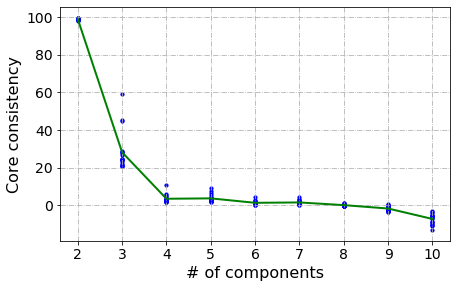

In [41]:
xs = np.array([list(range(start, num_k))] * top_k).T
xs_average = list(range(start, num_k))
# xs
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)
plt.scatter(xs, ys, 10, c='blue')

linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(xs_average, ys_average, color="green", **linestyle, fmt='-')

plt.xlabel("# of components", fontsize=16)
plt.ylabel("Core consistency", fontsize=16)
plt.grid(linestyle='-.')

In [42]:
pairs = pd.DataFrame([xs_average,ys_average])
# pairs = pairs.set_index(0).rename_axis(None)
# pairs.columns = [[''],['']]
print("Number of K vs. Core consistency")
pairs

Number of K vs. Core consistency


,0,1,2,3,4,5,6,7,8
0,2.000000,3.000000,4.000000,5.00000,6.000000,7.000000,8.000000,9.000000,10.000000
1,98.873901,28.157944,3.517165,3.71958,1.362537,1.559676,0.134367,-1.665065,-7.209135


## none-negative tensor decomposition

## Based on above curve, I choose K=2

In [35]:
import tensorly as tl
from tensorly.decomposition import non_negative_parafac

num_component = 2
print('tensor{}'.format(tensor_gcp_t.shape),'= component_1 + component_2 + ... + component_{}= [A,B,C]'.format(num_component))
weights, factors = non_negative_parafac(tl.tensor(tensor_gcp_t, dtype=tl.float32), rank=num_component, init='svd')


tensor(4, 58, 6) = component_1 + component_2 + ... + component_2= [A,B,C]


In [36]:
C_gcp = np.array(factors[0])
A_gcp = np.array(factors[1])
B_gcp = np.array(factors[2])
print('[A,B,C]:', A_gcp.shape, B_gcp.shape, C_gcp.shape)

[A,B,C]: (58, 2) (6, 2) (4, 2)


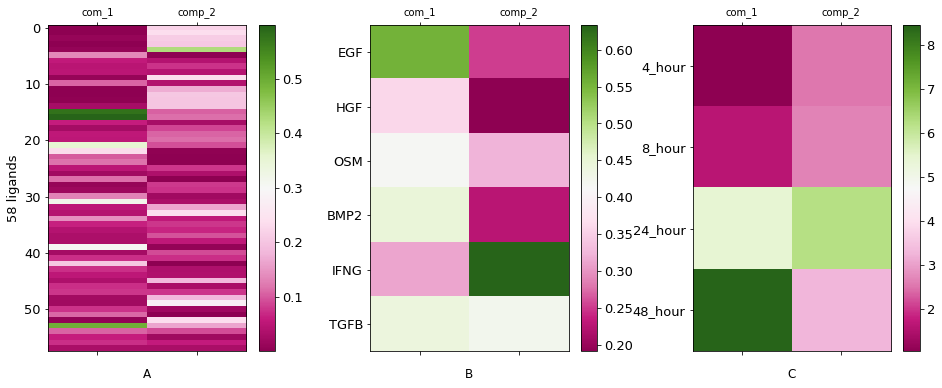

In [37]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0, wspace=0.3)

ax1 = fig.add_subplot(131)
cax1 = ax1.matshow(A_gcp)
ax1.set_aspect('auto')
ax1.set_title('A', y=-0.1)
fig.colorbar(cax1)
ax1.set_ylabel(str(tensor_gcp_t.shape[1])+' ligands', size=(13))
ax1.set_xticklabels(['','com_1', 'comp_2', 'comp_3'])

ax2 = fig.add_subplot(132)
cax2 = ax2.matshow(B_gcp)
ax2.set_aspect('auto')
ax2.set_title('B', y=-0.1)
fig.colorbar(cax2)
# ax2.set_ylabel(str(tensor.shape[2])+" ligands", size=(13))
ax2.set_yticklabels(['','EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB'])
ax2.set_xticklabels(['','com_1', 'comp_2', 'comp_3'])

ax3 = fig.add_subplot(133)
cax3 = ax3.matshow(C_gcp)
ax3.set_aspect('auto')
ax3.set_title('C', y=-0.1)
# ax3.set_ylabel(tensor.shape[0], size=(13))
ax3.set_yticklabels(['','4_hour','8_hour','24_hour','48_hour'])
ax3.set_xticklabels(['','com_1', 'comp_2', 'comp_3'])

fig.colorbar(cax3)

In [38]:
component_preds_gcp = A_gcp.argmax(axis=1) # classify proteins into respective components based on the largest membership values
print('{} histones in total, each protein belongs to a predicted component with the largest membership value:\n\n'.format(A_gcp.shape[0]), component_preds_gcp)

component_preds_B_gcp = B_gcp.argmax(axis=1) # classify proteins into respective components based on the largest membership values
print('{} ligands in total, each ligand belongs to a predicted component with the largest membership value:\n\n'.format(B_gcp.shape[0]), component_preds_B_gcp)


58 histones in total, each protein belongs to a predicted component with the largest membership value:

 [1 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0]
6 ligands in total, each ligand belongs to a predicted component with the largest membership value:

 [0 0 0 0 1 0]


['0~26', '27~57']
(6, 58, 4)


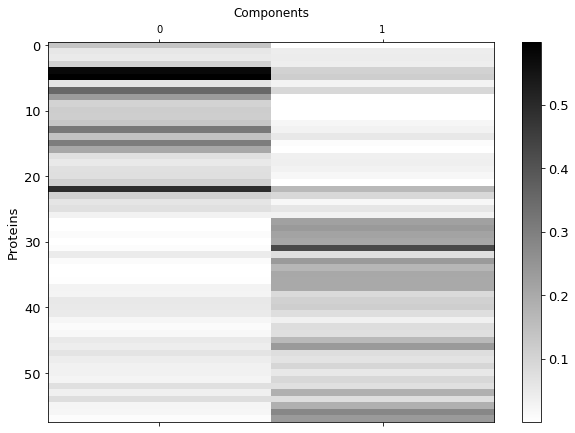

In [39]:
# rerange the proteins in matrix A
new_indexes = []
clusters = []
for k in range(num_component):
    idx = np.where(component_preds_gcp == k)[0]
    new_indexes.extend(idx)
    clusters.append(idx)

clustre_id_ranges = []
count = 0
for clu in clusters:
    id_range = str(count) + '~' + str(count+len(clu)-1)
    clustre_id_ranges.append(id_range)
    count += len(clu)
print(clustre_id_ranges)

# rank communities as a diagonal matrix
A_ranked_gcp = A_gcp[new_indexes]
histone_names_ranked = histone_names[new_indexes]
tensor_gcp_binary = gcp_averaged_binary.to_numpy()[new_indexes].reshape([gcp_averaged.shape[1],4,6]).transpose([2, 0, 1])
print(tensor_gcp_binary.shape)

fig = plt.figure(figsize=(10,7))
# fig.subplots_adjust(hspace=0, wspace=0.3)
ax = fig.add_subplot(111)
aa = ax.matshow(A_ranked_gcp,cmap=plt.cm.gray_r)
ax.set_aspect('auto')
ax.set_title('Components')
ax.set_ylabel('Proteins', size=(13))
ax.set_xticks(range(0,num_component))
fig.colorbar(aa)

In [40]:
for k in range(len(clusters)):
    histones = ' '.join(histone_names_ranked[clusters[k]])
    print('Histone cluster {}: {}\n'.format(k, histones))

Histone cluster 0: H3K9me3S10ph1K14ac0  H3K18ac0K23ac0  H3K27me0K36me0  H3K27me1K36me1  H3K27me0K36me1  H4(4to17)K5ac1me0 H4(4to17)K12ac1me0 H4(4to17)K5ac1K8ac1K16ac1me0 H4(20to23)K20me0 H4(20to23)K20me1 H4(20to23)K20me2 H3K4me0  H3K4me3  H3K4ac1  H3K9me1K14ac1  H3K18ac0K23ac1  H3K27me2K36me1  H3K27me3K36me0  H3K27me3K36me1  H3K27ac1K36me3  H3K79me2  H3K27me0K36me2  H4(4to17)K8ac1K12ac1me0 H4(4to17)K5ac1K16ac1me0 H4(4to17)K12ac1K16ac1me0 H4(4to17)K8ac1K12ac1K16ac1me0 H4(4to17)K5ac1K8ac1K12ac1K16ac1me0

Histone cluster 1: H3K9me0K14ac0  H3K9me1K14ac0  H3K9me3K14ac0  H3K9me0K14ac1  H3K9me2S10ph1K14ac0  H3K18ub1K23ac0  H3K27me1K36me0  H3K27me2K36me2  H3K27me3K36me2  H3K27ac1K36me1  H3.3K27me0K36me0  H4(4to17)K16ac1me0 H4(4to17)K5ac1K8ac1me0 H4(4to17)K5ac1K8ac1K12ac1me0 H4(20to23)K20me3 H4(68-78)AltNorm H3K4me1  H3K4me2  H3K9me2K14ac0  H3K9ac1K14ac0  H3K9me2K14ac1  H3K9me3K14ac1  H3K9ac1K14ac1  H3K18ac1K23ac0  H3K18ac1K23ac1  H3K27me1K36me2  H3K27ac1K36me2  H3K56me0  H3K79me0  H3K79me1  H4

In [41]:
for k in range(len(clusters)):
    histones = ' '.join(histone_names_ranked[clusters[k]])
    print('Histone cluster {}: {}\n'.format(k, histones))

Histone cluster 0: H3K9me3S10ph1K14ac0  H3K18ac0K23ac0  H3K27me0K36me0  H3K27me1K36me1  H3K27me0K36me1  H4(4to17)K5ac1me0 H4(4to17)K12ac1me0 H4(4to17)K5ac1K8ac1K16ac1me0 H4(20to23)K20me0 H4(20to23)K20me1 H4(20to23)K20me2 H3K4me0  H3K4me3  H3K4ac1  H3K9me1K14ac1  H3K18ac0K23ac1  H3K27me2K36me1  H3K27me3K36me0  H3K27me3K36me1  H3K27ac1K36me3  H3K79me2  H3K27me0K36me2  H4(4to17)K8ac1K12ac1me0 H4(4to17)K5ac1K16ac1me0 H4(4to17)K12ac1K16ac1me0 H4(4to17)K8ac1K12ac1K16ac1me0 H4(4to17)K5ac1K8ac1K12ac1K16ac1me0

Histone cluster 1: H3K9me0K14ac0  H3K9me1K14ac0  H3K9me3K14ac0  H3K9me0K14ac1  H3K9me2S10ph1K14ac0  H3K18ub1K23ac0  H3K27me1K36me0  H3K27me2K36me2  H3K27me3K36me2  H3K27ac1K36me1  H3.3K27me0K36me0  H4(4to17)K16ac1me0 H4(4to17)K5ac1K8ac1me0 H4(4to17)K5ac1K8ac1K12ac1me0 H4(20to23)K20me3 H4(68-78)AltNorm H3K4me1  H3K4me2  H3K9me2K14ac0  H3K9ac1K14ac0  H3K9me2K14ac1  H3K9me3K14ac1  H3K9ac1K14ac1  H3K18ac1K23ac0  H3K18ac1K23ac1  H3K27me1K36me2  H3K27ac1K36me2  H3K56me0  H3K79me0  H3K79me1  H4

In [42]:
new_indexes_B = []
clusters_B = []
for k in range(num_component):
    idx = np.where(component_preds_B_gcp == k)[0]
    new_indexes_B.extend(idx)
    clusters_B.append(idx)

clustre_id_ranges_B = []
count = 0
for clu in clusters_B:
    id_range = str(count) + '~' + str(count+len(clu)-1)
    clustre_id_ranges_B.append(id_range)
    count += len(clu)
print(clustre_id_ranges_B)

# rank communities as a diagonal matrix
B_ranked_gcp = B_gcp#[new_indexes_B]
ligand_names_gcp = np.array(ligand_names_gcp)
ligand_names_ranked_gcp = ligand_names_gcp#[new_indexes_B]
B_ranked_gcp
ligand_names_ranked_gcp

['0~4', '5~5']


array(['EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB'], dtype='<U4')

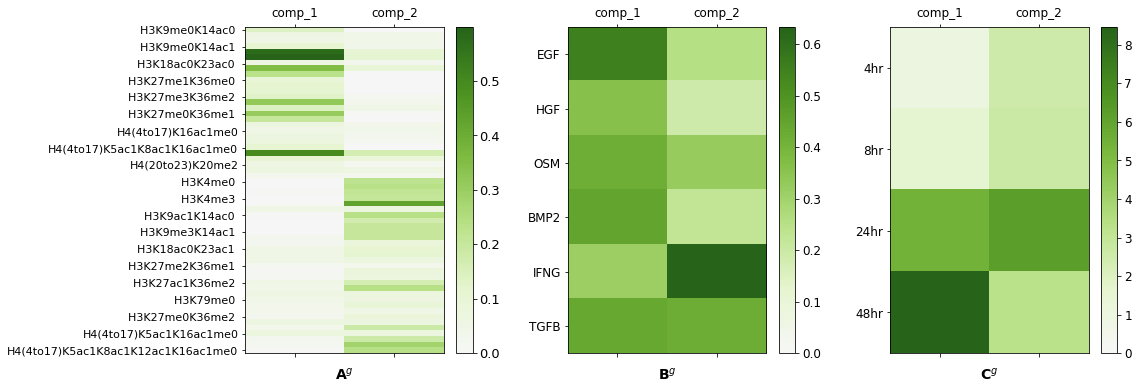

In [43]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0, wspace=0.3)

ax1 = fig.add_subplot(131)
cax1 = ax1.matshow(A_ranked_gcp,cmap='PiYG',norm = colors.DivergingNorm(vcenter=0))
ax1.set_aspect('auto')
ax1.set_title('$\mathbf{A}^g$', y=-0.1,fontsize=14)
fig.colorbar(cax1)
plt.rc('ytick',labelsize=12)
# ax1.set_ylabel(str(tensor_gcp_t.shape[1])+' histones', size=(15))

ax1.set_yticks(range(len(histone_names_ranked)))
loc = plticker.MultipleLocator(base=3) # this locator puts ticks at regular intervals
ax1.yaxis.set_major_locator(loc)
show_histone_names = histone_names_ranked[range(0, len(histone_names_ranked), 3)].insert(0,'')
ax1.set_yticklabels(show_histone_names, fontsize=11)

ax1.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'],fontsize=12)

ax2 = fig.add_subplot(132)
cax2 = ax2.matshow(B_ranked_gcp,cmap='PiYG',norm = colors.DivergingNorm(vcenter=0))
ax2.set_aspect('auto')
ax2.set_title('$\mathbf{B}^g$', y=-0.1,fontsize=14)
plt.rc('ytick',labelsize=12)
fig.colorbar(cax2)
# ax2.set_ylabel(str(tensor.shape[2])+" ligands", size=(13))
lnr = ['','EGF', 'HGF', 'OSM', 'BMP2', 'IFNG', 'TGFB']
ax2.set_yticklabels(lnr)
ax2.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'],fontsize=12)

ax3 = fig.add_subplot(133)
cax3 = ax3.matshow(C_gcp,cmap='PiYG',norm = colors.DivergingNorm(vcenter=0))
ax3.set_aspect('auto')
ax3.set_title('$\mathbf{C}^g$', y=-0.1,fontsize=14)
plt.rc('ytick',labelsize=12)
# ax3.set_ylabel(tensor.shape[0], size=(13))
ax3.set_yticklabels(['', '4hr','8hr','24hr','48hr'])
ax3.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'],fontsize=12)

fig.colorbar(cax3)

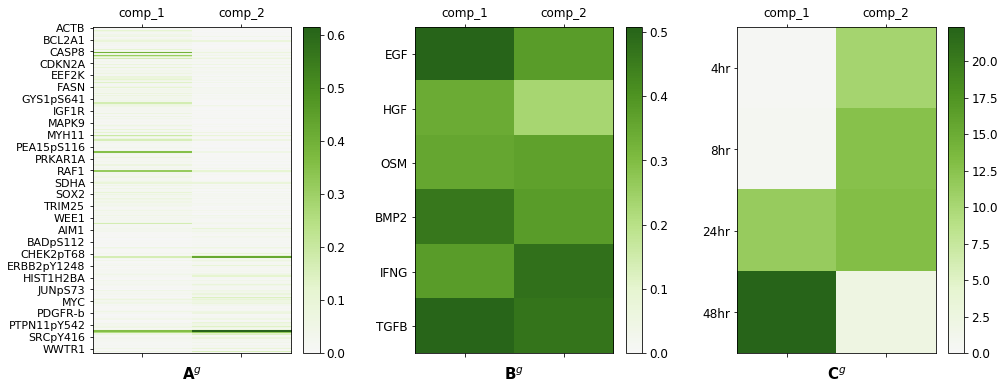

In [44]:
fig = plt.figure(figsize=(16,6))
fig.subplots_adjust(hspace=0, wspace=0.3)

ax1 = fig.add_subplot(131)
plt.set_cmap('PiYG')
norm = colors.DivergingNorm(vcenter=0)
cax1 = ax1.matshow(A_ranked,norm=norm)
ax1.set_aspect('auto')
ax1.set_title('$\mathbf{A}^g$', y=-0.1, fontsize=15)
plt.rc('ytick',labelsize=12)
fig.colorbar(cax1)

# ax1.set_ylabel(str(tensor.shape[1])+' proteins', fontsize=14)
ax1.set_yticks(range(len(protein_names_ranked)))
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax1.yaxis.set_major_locator(loc)
show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 10)].insert(0,'')
ax1.set_yticklabels(show_protein_names, fontsize=11)

ax1.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

ax2 = fig.add_subplot(132)

plt.set_cmap('PiYG')
cax2 = ax2.matshow(B_ranked,norm =colors.DivergingNorm(vcenter=0))
ax2.set_aspect('auto')
ax2.set_title('$\mathbf{B}^g$', y=-0.1, fontsize=15)
fig.colorbar(cax2)
plt.rc('ytick',labelsize=12)
# ax2.set_ylabel(str(tensor.shape[2])+" ligands", size=(13))
ax2.set_yticklabels(ligand_names_ranked.insert(0,''))
ax2.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

ax3 = fig.add_subplot(133)
cax3 = ax3.matshow(C, cmap='PiYG', norm =colors.DivergingNorm(vcenter=0))
ax3.set_aspect('auto')
ax3.set_title('$\mathbf{C}^g$', y=-0.1, fontsize=15)
plt.rc('ytick',labelsize=12)
# ax3.set_ylabel(tensor.shape[0], size=(13))
ax3.set_yticklabels(['', '4hr','8hr','24hr','48hr'])
ax3.set_xticklabels(['','comp_1', 'comp_2', 'comp_3'], fontsize=12)

fig.colorbar(cax3)

# import Image
# fig.savefig('testplot.png')
# Image.open('testplot.png').save('testplot.jpg','JPEG')

In [45]:
# save the A,B and C matrices
A_out = pd.DataFrame(data=A_ranked_gcp, index=histone_names_ranked, columns=['com_1','com_2'])
B_out = pd.DataFrame(data=B_ranked_gcp, index=ligand_names_ranked_gcp, columns=['com_1','com_2'])
C_out = pd.DataFrame(data=C_gcp, index=['4_hour','8_hour','24_hour','48_hour'], columns=['com_1','com_2'])


writer = pd.ExcelWriter("dataset/PLOS_results_2021-4-20/Tensorly/gcp/Factors_gcp_tensorly.xlsx")

A_out.to_excel(writer, "A")
B_out.to_excel(writer, "B")
C_out.to_excel(writer, "C")

writer.save()

## Fold Change Pattern mining

# combine A and B to calculate M1=AB_T

(58, 6)
mean:0.07613865286111832, std:0.06087508797645569


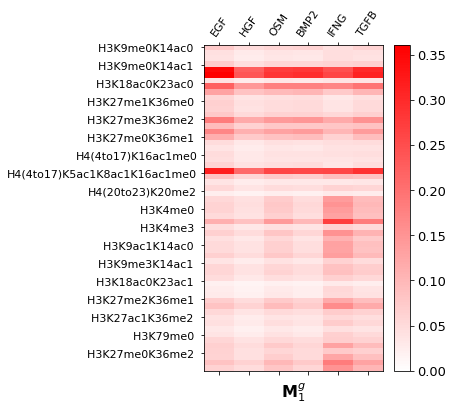

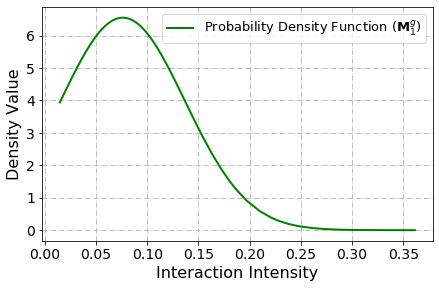

In [57]:
B_expand_gcp = np.expand_dims(B_ranked_gcp, axis=1)
patterns_AB_gcp = np.sum(np.transpose(np.multiply(A_ranked_gcp, B_expand_gcp), [1,0,2]), axis=2)
print(patterns_AB_gcp.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_AB_gcp,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor_gcp_t.shape[1])+' histones', size=(16))

ax.set_yticks(range(len(histone_names_ranked)))
loc = plticker.MultipleLocator(base=3.2) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
show_histone_names = histone_names_ranked[range(0, len(histone_names_ranked), 3)].insert(0,'')
ax.set_yticklabels(show_histone_names, fontsize=11)


plt.rc('ytick',labelsize=13)

# ax.set_xticks(range(0,num_component))
ax.set_xticklabels(lnr, fontsize=11, rotation =55)
ax.set_title('$\mathbf{M}_1^g$', y=-0.1, fontsize=16)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_AB_gcp = patterns_AB_gcp.flatten()
flatten_AB_gcp.sort()
mean, std = norm.fit(flatten_AB_gcp)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf_gcp = norm.pdf(flatten_AB_gcp, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_AB_gcp, fitted_pdf_gcp, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_1^g$)'], fontsize=13)
plt.grid(linestyle='-.')


writer_intensity_gcp = pd.ExcelWriter("dataset/PLOS_results_2021-4-20/Tensorly/gcp/Intensity_dist_gcp_tensorly.xlsx")

intense_density = np.concatenate([flatten_AB_gcp, fitted_pdf_gcp]).reshape(2,flatten_AB_gcp.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity_gcp, "M1_AB")
writer_intensity_gcp.save()

# end_ind = 16
# patterns_AB_part_gcp = patterns_AB_gcp[:end_ind]

# num_protein_gcp = patterns_AB_gcp.shape[0]
# pairs = pd.DataFrame(data=patterns_AB_part_gcp, index=range(end_ind), columns=ligand_names_ranked_gcp)
# s = pd.Series(range(end_ind))
# pairs= pairs.set_index([s, histone_names_ranked[s]])
# pairs

In [56]:
# B_expand = np.expand_dims(B_ranked, axis=1)
# patterns_AB = np.sum(np.transpose(np.multiply(A_ranked, B_expand), [1,0,2]), axis=2)
# print(patterns_AB.shape)

# fig = plt.figure(figsize=(4,6))
# ax = fig.add_subplot(111)
# aa = ax.matshow(patterns_AB,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
# ax.set_aspect('auto')
# # ax.set_title('Components')
# # ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(16))
# ax.set_yticks(range(len(protein_names_ranked)))
# loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
# ax.yaxis.set_major_locator(loc)
# show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 10)].insert(0,'')
# ax.set_yticklabels(show_protein_names, fontsize=11)

# plt.rc('ytick',labelsize=13)
# ax.set_xticklabels(ligand_names_ranked.insert(0,''), fontsize=13, rotation =25)
# ax.set_title('$\mathbf{M}_1^g$', y=-0.1, fontsize=16)
# fig.colorbar(aa)

# # fitting the data with a gaussian distribution
# from scipy.stats import norm
# fig = plt.figure(figsize=(7, 4.3))
# ax = fig.add_subplot(111)
# ax.tick_params(axis='both', which='major', labelsize=14)

# flatten_AB = patterns_AB.flatten()
# flatten_AB.sort()
# mean, std = norm.fit(flatten_AB)
# print('mean:{}, std:{}'.format(mean, std))

# fitted_pdf = norm.pdf(flatten_AB, loc=mean, scale=std)
# linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
# plt.errorbar(flatten_AB, fitted_pdf, color="green", **linestyle, fmt='-')
# plt.xlabel("Interaction Intensity", fontsize=16)
# plt.ylabel("Density Value", fontsize=16)
# plt.legend(['Probability Density Function ($\mathbf{M}_1^g$)'], fontsize=13)
# plt.grid(linestyle='-.')


# writer_intensity = pd.ExcelWriter("dataset/tumour_microenv_results_2020-9/gcp/Intensity_dist_gcp_tensorly.xlsx")

# intense_density = np.concatenate([flatten_AB, fitted_pdf]).reshape(2,flatten_AB.shape[0]).transpose([1,0])
# intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
# intense_density_mat.loc[-1] = [mean, std]
# intense_density_mat.index = intense_density_mat.index + 1
# intense_density_mat = intense_density_mat.sort_index()
# intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
# intense_density_mat.to_excel(writer_intensity, "M1_AB")
# writer_intensity.save()

# # start_ind = 175
# # patterns_AB_part = patterns_AB[start_ind:]

# # num_protein = patterns_AB.shape[0]
# # pairs = pd.DataFrame(data=patterns_AB_part, index=range(start_ind, num_protein), columns=ligand_names_ranked)
# # s = pd.Series(range(start_ind, num_protein))
# # pairs= pairs.set_index([s, protein_names_ranked[s]])
# # pairs

# combine A and C to calculate M2=AC_T

In [58]:
from matplotlib import colors

C_expand_gcp = np.expand_dims(C_gcp, axis=1)
patterns_AC_gcp = np.sum(np.transpose(np.multiply(A_ranked_gcp, C_expand_gcp), [1,0,2]), axis=2)
print(patterns_AC_gcp.shape)

patterns_AC_gcp_pairs_new = pd.DataFrame(data=patterns_AC_gcp, index=histone_names_ranked, 
                                     columns=['4_hour','8_hour','24_hour','48_hour'])

(58, 4)


(58, 4)
mean:0.782396674156189, std:0.7965512871742249


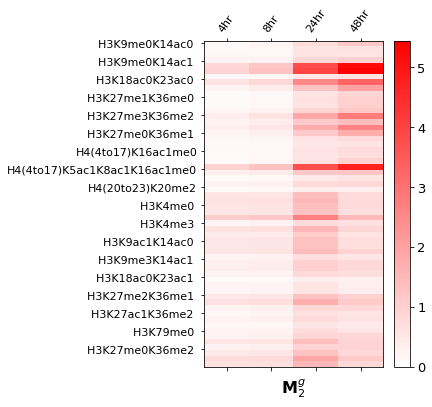

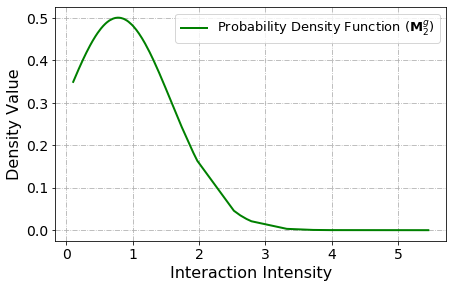

In [59]:
C_expand_gcp = np.expand_dims(C_gcp, axis=1)
patterns_AC_gcp = np.sum(np.transpose(np.multiply(A_ranked_gcp, C_expand_gcp), [1,0,2]), axis=2)
print(patterns_AC_gcp.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_AC_gcp,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor_gcp_t.shape[1])+' histones', size=(16))

ax.set_yticks(range(len(histone_names_ranked)))
loc = plticker.MultipleLocator(base=3.2) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
show_histone_names = histone_names_ranked[range(0, len(histone_names_ranked), 3)].insert(0,'')
ax.set_yticklabels(show_histone_names, fontsize=11)

# ax.set_xticks(range(0,num_component))
ax.set_xticklabels(['', '4hr','8hr','24hr','48hr'], fontsize=11, rotation =55)
ax.set_title('$\mathbf{M}_2^g$', y=-0.1, fontsize=16)
plt.rc('ytick',labelsize=13)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_AC_gcp = patterns_AC_gcp.flatten()
flatten_AC_gcp.sort()
mean, std = norm.fit(flatten_AC_gcp)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf_gcp = norm.pdf(flatten_AC_gcp, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_AC_gcp, fitted_pdf_gcp, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_2^g$)'], fontsize=13)
plt.grid(linestyle='-.')

intense_density = np.concatenate([flatten_AC_gcp, fitted_pdf_gcp]).reshape(2,flatten_AC_gcp.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity_gcp, "M2_AC")
writer_intensity_gcp.save()

In [53]:
# C_expand = np.expand_dims(C, axis=1)
# patterns_AC = np.sum(np.transpose(np.multiply(A_ranked, C_expand), [1,0,2]), axis=2)
# print(patterns_AC.shape)

# fig = plt.figure(figsize=(4,6))
# ax = fig.add_subplot(111)
# aa = ax.matshow(patterns_AC,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
# ax.set_aspect('auto')
# # ax.set_title('Components')
# # ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(16))

# ax.set_yticks(range(len(protein_names_ranked)))
# loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
# ax.yaxis.set_major_locator(loc)
# show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 10)].insert(0,'')
# ax.set_yticklabels(show_protein_names, fontsize=11)

# plt.rc('ytick',labelsize=13)

# # ax.set_xticks(range(0,num_component))
# # ax.set_xticklabels(['','4_hour','8_hour','24_hour','48_hour'])
# ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=13)
# ax.set_title('$\mathbf{M}_2^g$', y=-0.1, fontsize=16)
# fig.colorbar(aa)

# # fitting the data with a gaussian distribution
# from scipy.stats import norm
# fig = plt.figure(figsize=(7, 4.3))
# ax = fig.add_subplot(111)
# ax.tick_params(axis='both', which='major', labelsize=14)

# flatten_AC = patterns_AC.flatten()
# flatten_AC.sort()
# mean, std = norm.fit(flatten_AC)
# print('mean:{}, std:{}'.format(mean, std))

# fitted_pdf = norm.pdf(flatten_AC, loc=mean, scale=std)
# linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
# plt.errorbar(flatten_AC, fitted_pdf, color="green", **linestyle, fmt='-')
# plt.xlabel("Interaction Intensity", fontsize=16)
# plt.ylabel("Density Value", fontsize=16)
# plt.legend(['Probability Density Function ($\mathbf{M}_2^g$)'],fontsize=13)
# plt.grid(linestyle='-.')

# patterns_AC_pairs_new = pd.DataFrame(data=patterns_AC, index=protein_names_ranked, 
#                                      columns=['4_hour','8_hour','24_hour','48_hour'])


# intense_density = np.concatenate([flatten_AC, fitted_pdf]).reshape(2,flatten_AC.shape[0]).transpose([1,0])
# intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
# intense_density_mat.loc[-1] = [mean, std]
# intense_density_mat.index = intense_density_mat.index + 1
# intense_density_mat = intense_density_mat.sort_index()
# intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
# intense_density_mat.to_excel(writer_intensity, "M2_AC")
# writer_intensity.save()

# # start_ind = 230
# # patterns_AC_part = patterns_AC[start_ind:]

# # num_protein = patterns_AC.shape[0]
# # pairs = pd.DataFrame(data=patterns_AC_part, index=range(start_ind, num_protein), 
# # #                      columns=['4_hour','8_hour','24_hour','48_hour'])
# #                      columns=['1_hour','4_hour','8_hour','24_hour','48_hour'])
# # s = pd.Series(range(start_ind, num_protein))
# # pairs= pairs.set_index([s, protein_names_ranked[s]])
# # pairs

(58, 4)
EGF, mean:0.10517159438338773, std:1.1115667679359544
HGF, mean:0.3248314526060532, std:1.0682351198320381
OSM, mean:0.09577965408820531, std:1.1124153908084298
BMP2, mean:0.16642825504572228, std:1.1040576886047049
IFNG, mean:-0.036390477791428566, std:1.115937935985169
TGFB, mean:0.04022079507081673, std:1.115806448936642


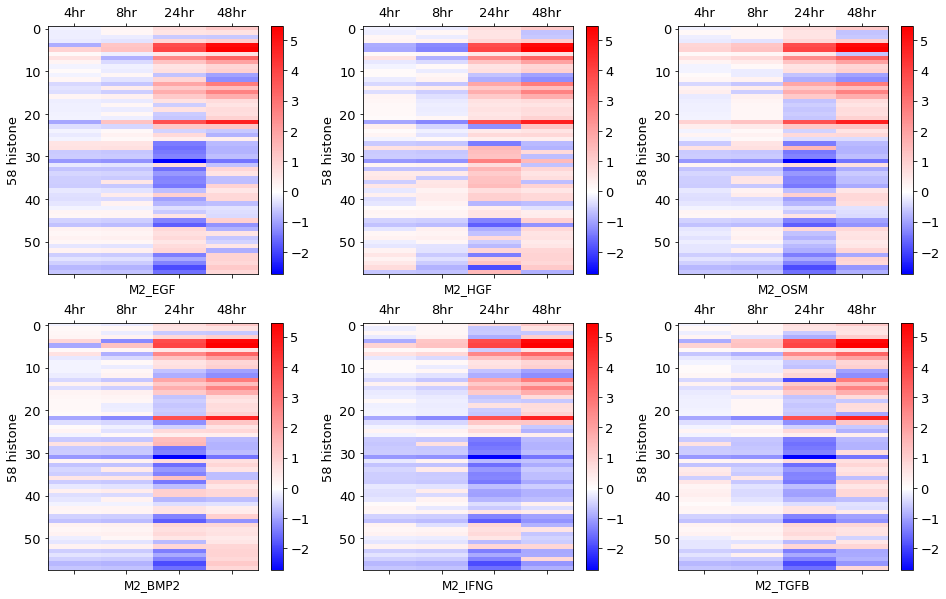

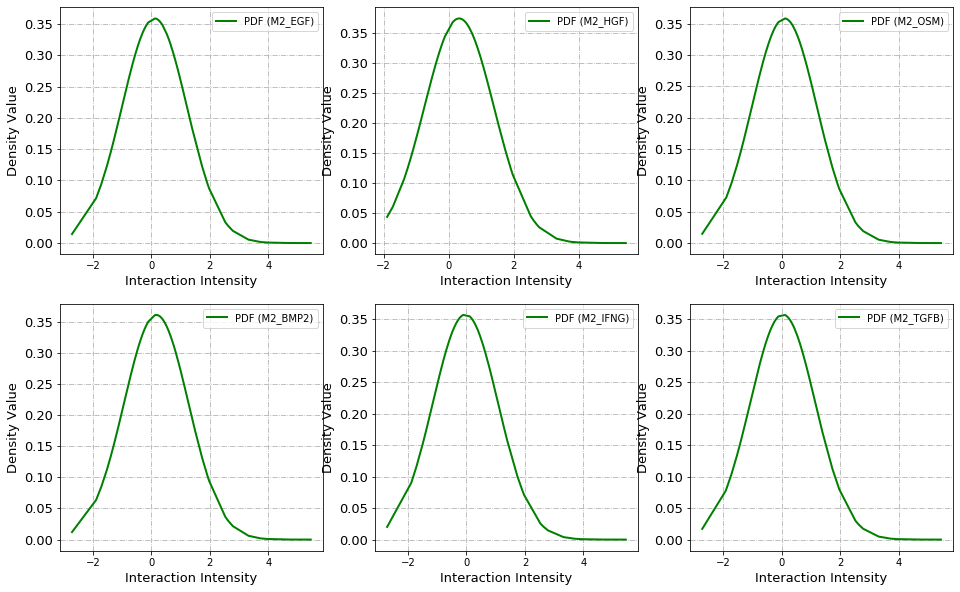

In [23]:
from matplotlib import colors

C_expand_gcp = np.expand_dims(C_gcp, axis=1)
patterns_AC_gcp = np.sum(np.transpose(np.multiply(A_ranked_gcp, C_expand_gcp), [1,0,2]), axis=2)
print(patterns_AC_gcp.shape)

patterns_AC_gcp_by_lignad = tensor_gcp_binary * patterns_AC_gcp

norm = colors.DivergingNorm(vcenter=0)
fig = plt.figure(figsize=(16,10))
plt.set_cmap('bwr')
for i in range(patterns_AC_gcp_by_lignad.shape[0]):
    ax = fig.add_subplot(2,3,i+1)
    aa = ax.matshow(patterns_AC_gcp_by_lignad[i], norm=norm)
    ax.set_aspect('auto')
    ax.set_ylabel(str(tensor_gcp_T.shape[0])+' histone', size=(13))
    ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=13)
    ax.set_title('M2_'+str(ligand_names_ranked_gcp[i]), y=-0.1)
    fig.colorbar(aa)
    
from scipy.stats import norm

fig = plt.figure(figsize=(16,10))
plt.set_cmap('bwr')
for i in range(patterns_AC_gcp_by_lignad.shape[0]):
    ax = fig.add_subplot(2,3,i+1)
#     ax.tick_params(axis='both', which='major', labelsize=14)
    flatten_AC_gcp = patterns_AC_gcp_by_lignad[i].flatten()
    flatten_AC_gcp.sort()
    mean, std = norm.fit(flatten_AC_gcp)
    print('{}, mean:{}, std:{}'.format(ligand_names_ranked_gcp[i], mean, std))
    fitted_pdf = norm.pdf(flatten_AC_gcp, loc=mean, scale=std)
    
    
    intense_density = np.concatenate([flatten_AC_gcp, fitted_pdf]).reshape(2,flatten_AC_gcp.shape[0]).transpose([1,0])
    intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
    intense_density_mat.loc[-1] = [mean, std]
    intense_density_mat.index = intense_density_mat.index + 1
    intense_density_mat = intense_density_mat.sort_index()
    intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
    intense_density_mat.to_excel(writer_intensity_gcp, "M2_AC_per_ligand_"+ligand_names_ranked_gcp[i])
    writer_intensity_gcp.save()
    
    linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
    plt.errorbar(flatten_AC_gcp, fitted_pdf, color="green", **linestyle, fmt='-')
    plt.xlabel("Interaction Intensity", fontsize=13)
    plt.ylabel("Density Value", fontsize=13)
    plt.legend(['PDF (M2_'+str(ligand_names_ranked_gcp[i])+")"])
    plt.grid(linestyle='-.')


# combine B and C to calculate M3=BC_T

(6, 4)
mean:3.0119545459747314, std:1.6520283222198486


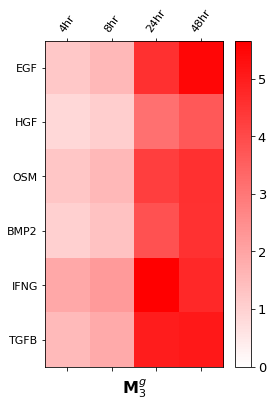

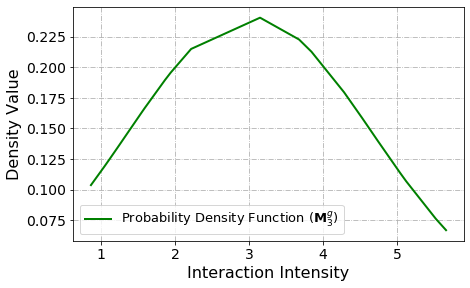

In [60]:
C_expand_gcp = np.expand_dims(C_gcp, axis=1)
patterns_BC_gcp = np.sum(np.transpose(np.multiply(B_ranked_gcp, C_expand_gcp), [1,0,2]), axis=2)
print(patterns_BC_gcp.shape)

fig = plt.figure(figsize=(4,6))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_BC_gcp,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')
# ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
# ax.set_xticks(range(0,num_component))
ax.set_yticklabels(lnr, fontsize=11)
# plt.rc('ytick',fontsize=13)
ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=11, rotation =55)
ax.set_title('$\mathbf{M}_3^g$', y=-0.1, fontsize=16)
fig.colorbar(aa)

# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

flatten_BC_gcp = patterns_BC_gcp.flatten()
flatten_BC_gcp.sort()
mean, std = norm.fit(flatten_BC_gcp)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf_gcp = norm.pdf(flatten_BC_gcp, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(flatten_BC_gcp, fitted_pdf_gcp, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function ($\mathbf{M}_3^g$)'], fontsize=13)
plt.grid(linestyle='-.')


intense_density = np.concatenate([flatten_BC_gcp, fitted_pdf_gcp]).reshape(2,flatten_BC_gcp.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_intensity_gcp, "M3_BC")
writer_intensity_gcp.save()

# patterns_BC_part_gcp = patterns_BC_gcp

# num_ligand_gcp = patterns_BC_gcp.shape[0]
# pairs = pd.DataFrame(data=patterns_BC_part_gcp, index=range(0,num_ligand_gcp), 
#                      columns=['4_hour','8_hour','24_hour','48_hour'])
# s = pd.Series(range(num_ligand_gcp))
# pairs= pairs.set_index([s, ligand_names_ranked_gcp[s]])
# pairs

In [54]:
# C_expand = np.expand_dims(C, axis=1)
# patterns_BC = np.sum(np.transpose(np.multiply(B_ranked, C_expand), [1,0,2]), axis=2)
# print(patterns_BC.shape)

# fig = plt.figure(figsize=(4,6))
# ax = fig.add_subplot(111)
# aa = ax.matshow(patterns_BC,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
# ax.set_aspect('auto')
# # ax.set_title('Components')
# # ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
# # ax.set_xticks(range(0,num_component))
# ax.set_yticklabels(ligand_names_ranked.insert(0,''), size=(13))



# ax.set_xticklabels(['','4hr','8hr','24hr','48hr'], fontsize=13)
# # ax.set_xticklabels(['','4_hour','8_hour','24_hour','48_hour'])
# ax.set_title('$\mathbf{M}_3^g$', y=-0.1, fontsize=16)
# fig.colorbar(aa)

# # fitting the data with a gaussian distribution
# from scipy.stats import norm
# fig = plt.figure(figsize=(7, 4.3))
# ax = fig.add_subplot(111)
# ax.tick_params(axis='both', which='major', labelsize=14)

# flatten_BC = patterns_BC.flatten()
# flatten_BC.sort()
# mean, std = norm.fit(flatten_BC)
# print('mean:{}, std:{}'.format(mean, std))

# fitted_pdf = norm.pdf(flatten_BC, loc=mean, scale=std)
# linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
# plt.errorbar(flatten_BC, fitted_pdf, color="green", **linestyle, fmt='-')
# plt.xlabel("Interaction Intensity", fontsize=16)
# plt.ylabel("Density Value", fontsize=16)
# plt.legend(['Probability Density Function ($\mathbf{M}_3^g$)'],fontsize=13)
# plt.grid(linestyle='-.')


# intense_density = np.concatenate([flatten_BC, fitted_pdf]).reshape(2,flatten_BC.shape[0]).transpose([1,0])
# intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
# intense_density_mat.loc[-1] = [mean, std]
# intense_density_mat.index = intense_density_mat.index + 1
# intense_density_mat = intense_density_mat.sort_index()
# intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
# intense_density_mat.to_excel(writer_intensity, "M3_BC")
# writer_intensity.save()


# patterns_BC_part = patterns_BC

# num_ligand = patterns_BC.shape[0]
# pairs = pd.DataFrame(data=patterns_BC_part, index=range(0,num_ligand), 
# #                      columns=['4_hour','8_hour','24_hour','48_hour'])
#                      columns=['4_hour','8_hour','24_hour','48_hour'])
# s = pd.Series(range(num_ligand))
# pairs= pairs.set_index([s, ligand_names_ranked[s]])
# pairs

In [61]:
# save M1, M2 and M3 into files

num_protein_gcp = patterns_AB_gcp.shape[0]
patterns_AB_gcp_pairs = pd.DataFrame(data=patterns_AB_gcp, index=histone_names_ranked, columns=ligand_names_ranked_gcp)


# num_protein_gcp = patterns_AC_gcp.shape[0]
# patterns_AC_gcp_pairs = pd.DataFrame(data=patterns_AC_gcp, index=histone_names_ranked, 
#                      columns=['4_hour','8_hour','24_hour','48_hour'])


# patterns_AC_gcp_pairs = pd.concat([pd.DataFrame(x, index=histone_names_ranked, 
#                              columns=['4_h','8_h','24_h','48_h']) for x in patterns_AC_gcp_by_lignad], 
#                axis=1,
#               keys=ligand_names_ranked_gcp)


num_ligand_gcp = patterns_BC_gcp.shape[0]
patterns_BC_gcp_pairs = pd.DataFrame(data=patterns_BC_gcp, index=ligand_names_ranked_gcp, 
                     columns=['4_hour','8_hour','24_hour','48_hour'])

writer_gcp = pd.ExcelWriter("dataset/PLOS_results_2021-4-20/Tensorly/gcp/M_gcp_tensorly.xlsx")

patterns_AB_gcp_pairs.to_excel(writer_gcp, "M1_AB")
patterns_AC_gcp_pairs_new.to_excel(writer_gcp, "M2_AC")
# patterns_AC_gcp_pairs.to_excel(writer_gcp, "M2_AC_per_ligands")
patterns_BC_gcp_pairs.to_excel(writer_gcp, "M3_BC")
writer_gcp.save()

In [55]:
# # save M1, M2 and M3 into files
# # num_protein = patterns_AB.shape[0]
# # patterns_AB_pairs = pd.DataFrame(data=patterns_AB, index=protein_names_ranked, columns=ligand_names_ranked)

# # patterns_AC_pairs = pd.concat([pd.DataFrame(x, index=protein_names_ranked, 
# #                              columns=['1_h','4_h','8_h','24_h','48_h']) for x in patterns_AC_by_lignad], 
# #                axis=1,
# #               keys=ligand_names_ranked)

# # num_ligand = patterns_BC.shape[0]
# # patterns_BC_pairs = pd.DataFrame(data=patterns_BC, index=ligand_names_ranked, 
# # #                      columns=['4_hour','8_hour','24_hour','48_hour'])
# #                      columns=['1_hour','4_hour','8_hour','24_hour','48_hour'])

# # writer = pd.ExcelWriter("data/M_rppa_ncp.xlsx")

# # patterns_AB_pairs.to_excel(writer, "M1_AB")
# # patterns_AC_pairs.to_excel(writer, "M2_AC")
# # patterns_BC_pairs.to_excel(writer, "M3_BC")
# # writer.save()


# # save M1, M2 and M3 into files
# num_protein = patterns_AB.shape[0]
# patterns_AB_pairs = pd.DataFrame(data=patterns_AB, index=protein_names_ranked, columns=ligand_names_ranked)

# patterns_AC_pairs = pd.concat([pd.DataFrame(x, index=protein_names_ranked, 
#                              columns=['4_h','8_h','24_h','48_h']) for x in patterns_AC_by_lignad], 
#                axis=1,
#               keys=ligand_names_ranked)

# num_ligand = patterns_BC.shape[0]
# patterns_BC_pairs = pd.DataFrame(data=patterns_BC, index=ligand_names_ranked, 
# #                      columns=['4_hour','8_hour','24_hour','48_hour'])
#                      columns=['4_hour','8_hour','24_hour','48_hour'])

# writer = pd.ExcelWriter("dataset/tumour_microenv_results_2020-9/gcp/M_gcp_tensorly.xlsx")

# patterns_AB_pairs.to_excel(writer, "M1_AB")
# patterns_AC_pairs_new.to_excel(writer, "M2_AC")
# patterns_AC_pairs.to_excel(writer, "M2_AC_per_ligands")
# patterns_BC_pairs.to_excel(writer, "M3_BC")

# writer.save()

In [62]:
writer_mean_gcp = pd.ExcelWriter("dataset/PLOS_results_2021-4-20/Tensorly/gcp/Correlation_by_cutoff_gcp_tensorly.xlsx")


# EGF, mean:0.10517159438338773, std:1.1115667679359544
# HGF, mean:0.3248314526060532, std:1.0682351198320381
# OSM, mean:0.09577965408820531, std:1.1124153908084298
# BMP2, mean:0.16642825504572228, std:1.1040576886047049
# IFNG, mean:-0.036390477791428566, std:1.115937935985169
# TGFB, mean:0.04022079507081673, std:1.115806448936642

M1_mean = 0.076138653
M2_mean = 0.782396674
# ['BMP2', 'EGF', 'HGF', 'IFNG', 'OSM', 'TGFB']
# M2_means = [0.03570696551977638, 0.011756499652441008, 0.09931713620397707, 
#               -0.03861529545261756, 0.005343753218159933, -0.007377338566836495]
M3_mean = 3.011954546 

#-----------------------center_MeanElbow-------------
M1_cutoff = 0.148731828 - M1_mean
M2_cutoff = 1.713861585 - M2_mean
# M2_cutoffs = np.array([0.406334216,0.391938488,0.503408146,0.391938488,0.406334216,0.406334216]) - np.array(M2_means)
M3_cutoff = 4.526049614 - M3_mean

AB_stack_gcp = patterns_AB_gcp_pairs.T.stack().to_frame()
AB_stack_gcp.columns = ['Itensity']
AB_stack_sorted_gcp = AB_stack_gcp[~(AB_stack_gcp.values - M1_mean  < M1_cutoff)]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M1_center_MeanElbow')
writer_mean_gcp.save()


AC_stack_gcp = patterns_AC_gcp_pairs_new.T.stack().to_frame()
AC_stack_gcp.columns = ['Itensity']
AC_stack_sorted_gcp = AC_stack_gcp[~((AC_stack_gcp.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_center_MeanElbow')
writer_mean_gcp.save()


# AC_stack_gcp = patterns_AC_gcp_pairs.T.stack().to_frame()
# AC_stack_gcp.columns = ['Itensity']

# left_rows = ~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) < M2_cutoffs[0]) &
#             ((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) > -M2_cutoffs[0]))
# for i in range(1,len(M2_cutoffs)):
#      left_rows=np.concatenate((left_rows,~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) < M2_cutoffs[i]) &
#             ((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

# AC_stack_sorted_gcp = AC_stack_gcp[left_rows]#.sort_values(by='Itensity',ascending=False)
# AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_per_ligand_center_MeanElbow')
# writer_mean_gcp.save()

BC_stack_gcp = patterns_BC_gcp_pairs.T.stack().to_frame()
BC_stack_gcp.columns = ['Itensity']
BC_stack_sorted_gcp = BC_stack_gcp[~(BC_stack_gcp.values < M3_cutoff)]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M3_center_MeanElbow')
writer_mean_gcp.save()

#------------------elbow-----------------
M1_cutoff = 0.209854484 - M1_mean
M2_cutoff = 2.524848938 - M2_mean
# M2_cutoffs = np.array([0.71890227,0.71890227,0.71890227,0.748516995,0.71890227,0.71890227]) - np.array(M2_means)
M3_cutoff = 5.522404671 - M3_mean

AB_stack_gcp = patterns_AB_gcp_pairs.T.stack().to_frame()
AB_stack_gcp.columns = ['Itensity']
AB_stack_sorted_gcp = AB_stack_gcp[~(AB_stack_gcp.values - M1_mean  < M1_cutoff)]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M1_center_Elbow')
writer_mean_gcp.save()


AC_stack_gcp = patterns_AC_gcp_pairs_new.T.stack().to_frame()
AC_stack_gcp.columns = ['Itensity']
AC_stack_sorted_gcp = AC_stack_gcp[~((AC_stack_gcp.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_center_Elbow')
writer_mean_gcp.save()


# AC_stack_gcp = patterns_AC_gcp_pairs.T.stack().to_frame()
# AC_stack_gcp.columns = ['Itensity']

# left_rows = ~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) < M2_cutoffs[0]) &
#             ((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) > -M2_cutoffs[0]))
# for i in range(1,len(M2_cutoffs)):
#      left_rows=np.concatenate((left_rows,~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) < M2_cutoffs[i]) &
#             ((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

# AC_stack_sorted_gcp = AC_stack_gcp[left_rows]#.sort_values(by='Itensity',ascending=False)
# AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_per_ligand_center_Elbow')
# writer_mean_gcp.save()

BC_stack_gcp = patterns_BC_gcp_pairs.T.stack().to_frame()
BC_stack_gcp.columns = ['Itensity']
BC_stack_sorted_gcp = BC_stack_gcp[~(BC_stack_gcp.values < M3_cutoff)]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M3_center_Elbow')
writer_mean_gcp.save()

#------------------asymptotic-----------------
M1_cutoff = 0.275422543 - M1_mean
M2_cutoff = 3.320796013 - M2_mean
# M2_cutoffs = np.array([1.173212185,1.173212185,1.173212185,1.173212185,1.173212185,1.173212185]) - np.array(M2_means)
M3_cutoff = 5.6606884 - M3_mean

AB_stack_gcp = patterns_AB_gcp_pairs.T.stack().to_frame()
AB_stack_gcp.columns = ['Itensity']
AB_stack_sorted_gcp = AB_stack_gcp[~(AB_stack_gcp.values - M1_mean  < M1_cutoff)]#.sort_values(by='Itensity',ascending=False)
AB_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M1_center_Asymptotic')
writer_mean_gcp.save()


AC_stack_gcp = patterns_AC_gcp_pairs_new.T.stack().to_frame()
AC_stack_gcp.columns = ['Itensity']
AC_stack_sorted_gcp = AC_stack_gcp[~((AC_stack_gcp.values-M2_mean < M2_cutoff))]#.sort_values(by='Itensity',ascending=False)
AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_center_Asymptotic')
writer_mean_gcp.save()


# AC_stack_gcp = patterns_AC_gcp_pairs.T.stack().to_frame()
# AC_stack_gcp.columns = ['Itensity']

# left_rows = ~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) < M2_cutoffs[0]) &
#             ((AC_stack_gcp.loc[ligand_names_ranked_gcp[0]].values-M2_means[0]) > -M2_cutoffs[0]))
# for i in range(1,len(M2_cutoffs)):
#      left_rows=np.concatenate((left_rows,~(((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) < M2_cutoffs[i]) &
#             ((AC_stack_gcp.loc[ligand_names_ranked_gcp[i]].values-M2_means[i]) > -M2_cutoffs[i]))),axis=0)

# AC_stack_sorted_gcp = AC_stack_gcp[left_rows]#.sort_values(by='Itensity',ascending=False)
# AC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M2_per_ligand_center_Asymptotic')
# writer_mean_gcp.save()

BC_stack_gcp = patterns_BC_gcp_pairs.T.stack().to_frame()
BC_stack_gcp.columns = ['Itensity']
BC_stack_sorted_gcp = BC_stack_gcp[~(BC_stack_gcp.values < M3_cutoff)]#.sort_values(by='Itensity',ascending=False)
BC_stack_sorted_gcp.to_excel(writer_mean_gcp, 'M3_center_Asymptotic')
writer_mean_gcp.save()

In [160]:
# # save the intensity distributions of M1, M2 and M3
# writer_id_gcp = pd.ExcelWriter("data/IntenseDist_gcp_tensorly_full.xlsx")

# # M1, M2 and M3

# fig = plt.figure(figsize=(16,6))
# # plt.figure(figsize=(16,6))
# # fig, ax= plt.subplots(nrows=1, ncols=3,figsize=(16,6))
# # fig, ax = plt.subplots(2, 3)

# # fig.subplots_adjust(hspace=0, wspace=0.3)
# # ax1 = ax[0,0]
# ax1 = fig.add_subplot(131)
# aa1 = ax1.matshow(patterns_AB_gcp,cmap=plt.cm.gray_r)
# ax1.set_aspect('auto')
# ax1.set_ylabel(str(tensor_gcp_t.shape[1])+' histones', size=(13))
# ax1.set_xticklabels(lnr)
# ax1.set_title('M1', y=-0.1)
# fig.colorbar(aa1)

# ax2 = fig.add_subplot(132)
# aa2 = ax2.matshow(patterns_AC_gcp,cmap=plt.cm.gray_r)
# ax2.set_aspect('auto')
# # ax.set_title('Components')
# ax2.set_ylabel(str(tensor_gcp_t.shape[1])+' histones', size=(13))
# # ax.set_xticks(range(0,num_component))
# ax2.set_xticklabels(['', '4_hour','8_hour','24_hour','48_hour'])
# ax2.set_title('M2', y=-0.1)
# fig.colorbar(aa2)


# ax3 = fig.add_subplot(133)
# aa3 = ax3.matshow(patterns_BC_gcp,cmap=plt.cm.gray_r)
# ax3.set_aspect('auto')
# # ax.set_title('Components')
# # ax.set_ylabel(str(tensor.shape[1])+' proteins', size=(13))
# # ax.set_xticks(range(0,num_component))
# ax3.set_yticklabels(lnr)
# ax3.set_xticklabels(['','4_hour','8_hour','24_hour','48_hour'])
# ax3.set_title('M3', y=-0.1)
# fig.colorbar(aa3)


# fig = plt.figure(figsize=(16,4))
# fig.subplots_adjust(hspace=0, wspace=0.3)

# ax1 = fig.add_subplot(131)
# ax1.tick_params(axis='both', which='major', labelsize=14)
# mean, std = norm.fit(flatten_AB_gcp)
# print('mean:{}, std:{}'.format(mean, std))
# fitted_pdf_gcp = norm.pdf(flatten_AB_gcp, loc=mean, scale=std)
# linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
# plt.errorbar(flatten_AB_gcp, fitted_pdf_gcp, color="green", **linestyle, fmt='-')
# plt.xlabel("Interaction Intensity", fontsize=13)
# plt.ylabel("Density Value", fontsize=13)
# plt.legend(['Probability Density Function (M1)'])
# plt.grid(linestyle='-.')

# #___________________________________
# intense_density = np.concatenate([flatten_AB_gcp, fitted_pdf_gcp]).reshape(2,flatten_AB_gcp.shape[0]).transpose([1,0])
# intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
# intense_density_mat.loc[-1] = [mean, std]
# intense_density_mat.index = intense_density_mat.index + 1
# intense_density_mat = intense_density_mat.sort_index()
# intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
# intense_density_mat.to_excel(writer_id_gcp, "M1")
# #___________________________________


# ax2 = fig.add_subplot(132)
# ax2.tick_params(axis='both', which='major', labelsize=13)
# mean, std = norm.fit(flatten_AC_gcp)
# print('mean:{}, std:{}'.format(mean, std))
# fitted_pdf_gcp = norm.pdf(flatten_AC_gcp, loc=mean, scale=std)
# linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
# plt.errorbar(flatten_AC_gcp, fitted_pdf_gcp, color="green", **linestyle, fmt='-')
# plt.xlabel("Interaction Intensity", fontsize=13)
# plt.ylabel("Density Value", fontsize=13)
# plt.legend(['Probability Density Function (M2)'])
# plt.grid(linestyle='-.')

# #___________________________________
# intense_density = np.concatenate([flatten_AC_gcp, fitted_pdf_gcp]).reshape(2,flatten_AC_gcp.shape[0]).transpose([1,0])
# intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
# intense_density_mat.loc[-1] = [mean, std]
# intense_density_mat.index = intense_density_mat.index + 1
# intense_density_mat = intense_density_mat.sort_index()
# intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
# intense_density_mat.to_excel(writer_id_gcp, "M2")
# #___________________________________

# ax3 = fig.add_subplot(133)
# ax3.tick_params(axis='both', which='major', labelsize=13)
# mean, std = norm.fit(flatten_BC_gcp)
# print('mean:{}, std:{}'.format(mean, std))
# fitted_pdf_gcp = norm.pdf(flatten_BC_gcp, loc=mean, scale=std)
# linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
# plt.errorbar(flatten_BC_gcp, fitted_pdf_gcp, color="green", **linestyle, fmt='-')
# plt.xlabel("Interaction Intensity", fontsize=13)
# plt.ylabel("Density Value", fontsize=13)
# plt.legend(['Probability Density Function (M3)'])
# plt.grid(linestyle='-.')

# #___________________________________
# intense_density = np.concatenate([flatten_BC_gcp, fitted_pdf_gcp]).reshape(2,flatten_BC_gcp.shape[0]).transpose([1,0])
# intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
# intense_density_mat.loc[-1] = [mean, std]
# intense_density_mat.index = intense_density_mat.index + 1
# intense_density_mat = intense_density_mat.sort_index()
# intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
# intense_density_mat.to_excel(writer_id_gcp, "M3")
# #___________________________________

# writer_id_gcp.save()

# combine M1_rppa and M1_gcp to calculate M4=BC_T

(274, 58)
mean:0.013823795888092525, std:0.024633240245088207


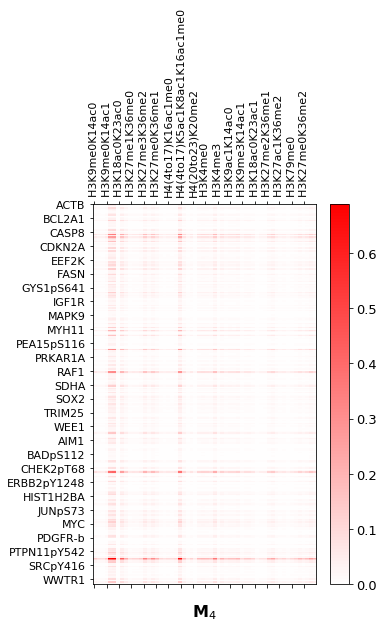

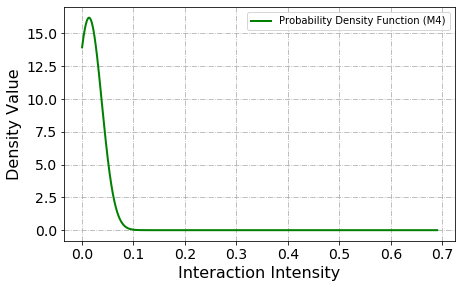

In [64]:
writer_rppa_gcp = pd.ExcelWriter("dataset/PLOS_results_2021-4-20/Tensorly/M4_with_Intensity_dist_tensorly.xlsx")

patterns_AB_gcp_expand = np.expand_dims(patterns_AB_gcp, axis=1)
patterns_rppa_gcp = np.sum(np.transpose(np.multiply(patterns_AB, patterns_AB_gcp_expand), [1,0,2]), axis=2)
print(patterns_rppa_gcp.shape)

fig = plt.figure(figsize=(5,7))
ax = fig.add_subplot(111)
aa = ax.matshow(patterns_rppa_gcp,cmap='bwr', norm =colors.DivergingNorm(vcenter=0))
ax.set_aspect('auto')
# ax.set_title('Components')

ax.set_yticks(range(len(protein_names_ranked)))
loc = plticker.MultipleLocator(base=10) # this locator puts ticks at regular intervals
ax.yaxis.set_major_locator(loc)
show_protein_names = protein_names_ranked[range(0, len(protein_names_ranked), 10)].insert(0,'')
ax.set_yticklabels(show_protein_names, fontsize=11)

# ax.set_ylabel(str(patterns_rppa_gcp.shape[0])+' proteins', size=(13))
# ax.set_xticks(range(0,num_component))
# ax.set_xticklabels(ligand_names.insert(0,''))
# ax.set_xlabel(str(patterns_rppa_gcp.shape[1])+' histones', size=(13))


ax.set_xticks(range(len(histone_names_ranked)))
loc = plticker.MultipleLocator(base=3.2) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
show_histone_names = histone_names_ranked[range(0, len(histone_names_ranked), 3)].insert(0,'')
ax.set_xticklabels(show_histone_names, fontsize=11, rotation=90)


ax.set_title("$\mathbf{M}_4$", y=-0.1,fontsize=16)
fig.colorbar(aa)


patterns_rppa_gcp_pairs = pd.DataFrame(data=patterns_rppa_gcp, 
                                       index=protein_names_ranked, 
                                       columns=histone_names_ranked)

patterns_rppa_gcp_pairs.to_excel(writer_rppa_gcp, "M4")
writer_rppa_gcp.save()


# fitting the data with a gaussian distribution
from scipy.stats import norm
fig = plt.figure(figsize=(7, 4.3))
ax = fig.add_subplot(111)
ax.tick_params(axis='both', which='major', labelsize=14)

patterns_rppa_gcp_ = patterns_rppa_gcp.flatten()
patterns_rppa_gcp_.sort()
mean, std = norm.fit(patterns_rppa_gcp_)
print('mean:{}, std:{}'.format(mean, std))

fitted_pdf = norm.pdf(patterns_rppa_gcp_, loc=mean, scale=std)
linestyle = {"linestyle":"-", "linewidth":2, "markeredgewidth":2, "elinewidth":2, "capsize":5}
plt.errorbar(patterns_rppa_gcp_, fitted_pdf, color="green", **linestyle, fmt='-')
plt.xlabel("Interaction Intensity", fontsize=16)
plt.ylabel("Density Value", fontsize=16)
plt.legend(['Probability Density Function (M4)'])
plt.grid(linestyle='-.')


intense_density = np.concatenate([patterns_rppa_gcp_, fitted_pdf]).reshape(2,patterns_rppa_gcp_.shape[0]).transpose([1,0])
intense_density_mat = pd.DataFrame(data=intense_density, columns=['Intensity','Dnesity'])
intense_density_mat.loc[-1] = [mean, std]
intense_density_mat.index = intense_density_mat.index + 1
intense_density_mat = intense_density_mat.sort_index()
intense_density_mat.rename(index = {0: "mean/std"}, inplace = True)
intense_density_mat.to_excel(writer_rppa_gcp, "M4_Intensity_dist")
writer_rppa_gcp.save()



In [65]:
M4_mean = 0.013823795888092525

#-----------------------center_MeanElbow-------------
M4_cutoff = 0.044381475 - M4_mean

rppa_gcp_stack = patterns_rppa_gcp_pairs.T.stack().to_frame()
rppa_gcp_stack.columns = ['Itensity']
rppa_gcp_stack_sorted = rppa_gcp_stack[~((rppa_gcp_stack.values-M4_mean < M4_cutoff))]#.sort_values(by='Itensity',ascending=False)
rppa_gcp_stack_sorted.to_excel(writer_rppa_gcp, 'M4_center_MeanElbow')
writer_rppa_gcp.save()

#------------------elbow-----------------
M4_cutoff = 0.079927045 - M4_mean

rppa_gcp_stack = patterns_rppa_gcp_pairs.T.stack().to_frame()
rppa_gcp_stack.columns = ['Itensity']
rppa_gcp_stack_sorted = rppa_gcp_stack[~((rppa_gcp_stack.values-M4_mean < M4_cutoff))]#.sort_values(by='Itensity',ascending=False)
rppa_gcp_stack_sorted.to_excel(writer_rppa_gcp, 'M4_Elbow')
writer_rppa_gcp.save()

#------------------asymptotic-----------------
M4_cutoff = 0.100524308 - M4_mean

rppa_gcp_stack = patterns_rppa_gcp_pairs.T.stack().to_frame()
rppa_gcp_stack.columns = ['Itensity']
rppa_gcp_stack_sorted = rppa_gcp_stack[~((rppa_gcp_stack.values-M4_mean < M4_cutoff))]#.sort_values(by='Itensity',ascending=False)
rppa_gcp_stack_sorted.to_excel(writer_rppa_gcp, 'M4_Asymptotic')
writer_rppa_gcp.save()